<a href="https://colab.research.google.com/github/thecat065/telecom-x-analisis-evasion/blob/main/TelecomX_0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importación de bibliotecas necesarias
import requests
import pandas as pd

# Definición de la URL de la API para la extracción de datos
# Se utiliza el enlace "raw" del archivo JSON en GitHub para acceso directo al contenido.
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Paso 1: Extracción de datos desde la API
# Objetivo: Cargar los datos JSON y convertirlos a un DataFrame de Pandas.

# Realización de la solicitud GET a la API
try:
    response = requests.get(api_url)
    response.raise_for_status()  # Verificar si la solicitud fue exitosa (códigos 2xx)

    # Conversión de la respuesta JSON a una estructura de datos de Python (lista de diccionarios)
    datos_json = response.json()

    # Creación de un DataFrame de Pandas a partir de los datos JSON
    df_telecom = pd.DataFrame(datos_json)

    # Verificación inicial de la carga de datos
    print("--- Inicio: Paso 1 Extracción (E - Extract) ---")
    print(f"Datos extraídos exitosamente desde: {api_url}")
    print(f"Número de registros cargados: {len(df_telecom)}")
    print("\nPrimeras 5 filas del DataFrame:")
    print(df_telecom.head())
    print("\nInformación general del DataFrame:")
    df_telecom.info()
    print("--- Fin: Paso 1 Extracción (E - Extract) ---")

except requests.exceptions.HTTPError as http_err:
    print(f"Error HTTP durante la extracción: {http_err}")
except requests.exceptions.RequestException as req_err:
    print(f"Error en la solicitud de extracción: {req_err}")
except ValueError as json_err: # Captura errores si la respuesta no es JSON válido
    print(f"Error al decodificar JSON: {json_err}")
    print("Contenido de la respuesta (primeros 500 caracteres):")
    # Es útil imprimir parte de la respuesta si no es JSON para depurar.
    if 'response' in locals() and hasattr(response, 'text'):
        print(response.text[:500])
except Exception as e:
    print(f"Ocurrió un error inesperado durante la extracción: {e}")

# El DataFrame df_telecom está listo para las siguientes etapas (Transformación y Carga).

--- Inicio: Paso 1 Extracción (E - Extract) ---
Datos extraídos exitosamente desde: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json
Número de registros cargados: 7267

Primeras 5 filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'Mul

In [3]:
# Paso: 2.1. Conocer el conjunto de datos
# Objetivo: Explorar las columnas, verificar tipos de datos y comprender su significado.

print("\n--- Inicio: Paso 2.1 Conocer el conjunto de datos (T - Transform) ---")

# Visualización de la información general del DataFrame (repaso)
print("\nInformación general del DataFrame:")
df_telecom.info()

# Visualización de los tipos de datos por columna
print("\nTipos de datos por columna:")
print(df_telecom.dtypes)

# Visualización de las primeras filas para observar la estructura de las columnas anidadas
print("\nPrimeras filas del DataFrame (repaso para observar estructura):")
print(df_telecom.head())

# Exploración del contenido de las columnas que son objetos (potencialmente diccionarios)
# Se examinará la primera entrada de cada columna que parece anidada para entender su estructura.
print("\nContenido de muestra de columnas anidadas (primer registro):")
for col in ['customer', 'phone', 'internet', 'account']:
    if col in df_telecom.columns:
        print(f"\nColumna '{col}':")
        # Verificar que la columna existe y que el primer elemento no es None antes de accederlo
        if not df_telecom[col].empty and df_telecom[col].iloc[0] is not None:
            print(df_telecom[col].iloc[0])
        else:
            print(f"La columna '{col}' está vacía o el primer elemento es None.")
    else:
        print(f"La columna '{col}' no se encontró en el DataFrame.")


# Identificación preliminar de columnas relevantes para el análisis de evasión ('Churn'):
# - 'customerID': Identificador único, útil para seguimiento pero no directamente para modelar la evasión.
# - 'Churn': Variable objetivo, indica si el cliente evadió o no. Es fundamental.
# - 'customer': Contiene datos demográficos del cliente (género, si es adulto mayor, si tiene pareja, dependientes).
#   Estos factores pueden influir en la decisión de evadir.
# - 'phone': Contiene información sobre los servicios telefónicos (si tiene servicio, múltiples líneas).
#   La calidad o tipo de servicio telefónico podría ser un factor.
# - 'internet': Contiene información sobre los servicios de internet (tipo de servicio, seguridad online, backup, etc.).
#   Similar al servicio telefónico, la calidad y características del servicio de internet son importantes.
# - 'account': Contiene información sobre la cuenta del cliente (tipo de contrato, facturación electrónica, método de pago,
#   cargos mensuales, cargos totales). Los aspectos contractuales y financieros son altamente relevantes para la evasión.

# Conclusión de esta sub-etapa:
# Las columnas 'customer', 'phone', 'internet', y 'account' contienen datos estructurados como diccionarios.
# Estos necesitarán ser "aplanados" o "desanidados" para que cada atributo interno se convierta en una columna separada.
# Todas las columnas, excepto quizás 'customerID' directamente, parecen relevantes para entender el 'Churn'.
# La variable 'Churn' es la variable objetivo.

print("\n--- Fin: Paso 2.1 Conocer el conjunto de datos (T - Transform) ---")


--- Inicio: Paso 2.1 Conocer el conjunto de datos (T - Transform) ---

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Tipos de datos por columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Primeras filas del DataFrame (repaso para observar estructura):
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'Se

In [6]:
# Paso: 2.2. Comprobación de incoherencias en los datos
# Objetivo: Identificar valores ausentes, duplicados, errores de formato e inconsistencias.

print("\n--- Inicio: Paso 2.2 Comprobación de incoherencias (T - Transform) ---")

# 1. Verificación de valores ausentes (NaN/Null)
# A nivel de columnas principales del DataFrame.
print("\nValores ausentes por columna (nivel superior):")
print(df_telecom.isnull().sum())
# Nota: No hay NaN a nivel de las columnas principales.
# Los valores problemáticos dentro de los diccionarios (e.g., strings vacíos)
# se abordarán durante el aplanamiento y limpieza.

# 2. Verificación de registros duplicados
# La verificación de filas completamente idénticas (df_telecom.duplicated().sum())
# no es posible directamente en esta etapa debido a las columnas que contienen diccionarios (tipo no hashable).
# Esta verificación se realizará después de aplanar el DataFrame.

# Por ahora, se verifica si hay customerID duplicados, ya que debería ser único.
duplicados_id = df_telecom['customerID'].duplicated().sum()
print(f"\nNúmero de customerID duplicados: {duplicados_id}")
if duplicados_id > 0:
    print("ADVERTENCIA: Se encontraron customerID duplicados. Esto requiere investigación.")

# 3. Exploración inicial de valores únicos en columnas clave
# Se examina la columna 'Churn' para identificar sus categorías.
print("\nValores únicos en la columna 'Churn':")
print(df_telecom['Churn'].unique())
# Se espera 'No', 'Yes'. Otros valores como '' o ' ' serían problemáticos.

# 4. Identificación de posibles problemas de formato o tipo dentro de los datos anidados (preliminar)
# Se sabe que 'customer', 'phone', 'internet', 'account' contienen diccionarios.
# La inspección de 'account.Charges.Total' es un ejemplo.

print("\nInspección de una muestra de datos en 'account' para 'Charges.Total':")
if not df_telecom['account'].empty:
    # Se asegura que el primer elemento exista y sea un diccionario
    if isinstance(df_telecom['account'].iloc[0], dict):
        primer_account = df_telecom['account'].iloc[0]
        if 'Charges' in primer_account and isinstance(primer_account.get('Charges'), dict) and \
           'Total' in primer_account['Charges']:
            print(f"Tipo de 'account.Charges.Total' en el primer registro: {type(primer_account['Charges']['Total'])}")
            print(f"Valor de 'account.Charges.Total' en el primer registro: {primer_account['Charges']['Total']}")
        else:
            print("El primer registro no tiene la estructura esperada para 'account.Charges.Total' (faltan 'Charges' o 'Total' o no son dict).")
    else:
        print("El primer elemento de la columna 'account' no es un diccionario.")
else:
    print("La columna 'account' está vacía.")

# Comentario sobre inconsistencias y formato (revisado):
# - No se detectaron valores nulos a nivel de columnas principales.
# - No se encontraron 'customerID' duplicados (según la salida previa).
# - La columna 'Churn' tiene valores 'Yes' y 'No', lo cual es adecuado.
# - Las columnas anidadas ('customer', 'phone', 'internet', 'account') contienen datos que
#   necesitarán ser extraídos y transformados:
#     - 'customer.SeniorCitizen' y 'customer.tenure' (numéricos).
#     - 'account.Charges.Monthly' (numérico).
#     - 'account.Charges.Total' (string que representa un número, necesita conversión).
# - Se anticipa la necesidad de manejar valores como "No internet service" o strings vacíos
#   (' ') durante el proceso de aplanamiento y limpieza de datos.
# - La comprobación completa de filas duplicadas se realizará después del aplanamiento de las columnas de diccionario.

print("\n--- Fin: Paso 2.2 Comprobación de incoherencias (T - Transform) ---")


--- Inicio: Paso 2.2 Comprobación de incoherencias (T - Transform) ---

Valores ausentes por columna (nivel superior):
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Número de customerID duplicados: 0

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Inspección de una muestra de datos en 'account' para 'Charges.Total':
Tipo de 'account.Charges.Total' en el primer registro: <class 'str'>
Valor de 'account.Charges.Total' en el primer registro: 593.3

--- Fin: Paso 2.2 Comprobación de incoherencias (T - Transform) ---


In [16]:
# Importación de bibliotecas necesarias (asegurarse de que numpy esté importado)
import numpy as np

# Paso: 2.3. Manejo de inconsistencias
# Objetivo: Corregir datos, aplanar estructuras anidadas y asegurar coherencia.

print("\n--- Inicio: Paso 2.3 Manejo de inconsistencias (T - Transform) ---")

# Copia del DataFrame para evitar modificar el original en caso de necesitar re-ejecutar celdas
# Si df_telecom es el DataFrame original cargado en el paso 1.
# En un flujo secuencial de notebook, esto podría no ser necesario si las celdas se ejecutan en orden.
# df_processed = df_telecom.copy() # Descomentar si se prefiere trabajar con una copia

# 1. Manejo de strings vacíos en la columna 'Churn'
print("\nTratamiento de la columna 'Churn':")
print(f"Valores únicos en 'Churn' antes: {df_telecom['Churn'].unique()}")
empty_churn_count = (df_telecom['Churn'] == '').sum()
print(f"Número de registros con 'Churn' como string vacío: {empty_churn_count}")

# Reemplazar strings vacíos en 'Churn' con NaN
df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)

# Eliminar filas donde 'Churn' es NaN (originalmente strings vacíos)
initial_rows = len(df_telecom)
df_telecom.dropna(subset=['Churn'], inplace=True)
rows_after_churn_cleaning = len(df_telecom)
print(f"Filas eliminadas debido a 'Churn' vacío/NaN: {initial_rows - rows_after_churn_cleaning}")
print(f"Valores únicos en 'Churn' después: {df_telecom['Churn'].unique()}")

# 2. Aplanamiento de columnas que contienen diccionarios
print("\nAplanando columnas con datos anidados...")

# Aplanar 'customer'
customer_details = df_telecom['customer'].apply(lambda x: pd.Series(x) if isinstance(x, dict) else pd.Series([None]*5, index=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']))
customer_details = customer_details.rename(columns=lambda col_name: f"customer_{col_name}")

# Aplanar 'phone'
phone_details = df_telecom['phone'].apply(lambda x: pd.Series(x) if isinstance(x, dict) else pd.Series([None]*2, index=['PhoneService', 'MultipleLines']))
phone_details = phone_details.rename(columns=lambda col_name: f"phone_{col_name}")

# Aplanar 'internet'
internet_keys = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet_details = df_telecom['internet'].apply(lambda x: pd.Series(x) if isinstance(x, dict) else pd.Series([None]*len(internet_keys), index=internet_keys))
internet_details = internet_details.rename(columns=lambda col_name: f"internet_{col_name}")

# Aplanar 'account' (manejando la estructura anidada de 'Charges')
account_data_list = []
for index, row_account in df_telecom['account'].items():
    acc_dict = {}
    if isinstance(row_account, dict):
        acc_dict['account_Contract'] = row_account.get('Contract')
        acc_dict['account_PaperlessBilling'] = row_account.get('PaperlessBilling')
        acc_dict['account_PaymentMethod'] = row_account.get('PaymentMethod')
        charges = row_account.get('Charges', {})
        if isinstance(charges, dict):
            acc_dict['account_MonthlyCharges'] = charges.get('Monthly')
            acc_dict['account_TotalCharges'] = charges.get('Total')
        else:
            acc_dict['account_MonthlyCharges'] = np.nan
            acc_dict['account_TotalCharges'] = np.nan
    else: # Si la entrada de 'account' no es un diccionario
        acc_dict = {
            'account_Contract': np.nan, 'account_PaperlessBilling': np.nan,
            'account_PaymentMethod': np.nan, 'account_MonthlyCharges': np.nan,
            'account_TotalCharges': np.nan
        }
    account_data_list.append(acc_dict)
account_details = pd.DataFrame(account_data_list, index=df_telecom.index)

# Concatenar los nuevos DataFrames con el DataFrame principal
df_telecom = pd.concat([df_telecom, customer_details, phone_details, internet_details, account_details], axis=1)

# Eliminar las columnas originales de diccionario
columns_to_drop_original = ['customer', 'phone', 'internet', 'account']
df_telecom.drop(columns=columns_to_drop_original, inplace=True)
print("Columnas anidadas aplanadas y originales eliminadas.")

# 3. Conversión de tipos de datos y manejo de 'account_TotalCharges'
print("\nConvirtiendo tipos de datos y manejando 'account_TotalCharges'...")

# Convertir 'account_TotalCharges' a numérico, los errores se convierten en NaN
df_telecom['account_TotalCharges'] = pd.to_numeric(df_telecom['account_TotalCharges'], errors='coerce')
nan_total_charges_initial = df_telecom['account_TotalCharges'].isnull().sum()
print(f"NaN en 'account_TotalCharges' después de conversión a numérico: {nan_total_charges_initial}")

# Imputar NaN en 'account_TotalCharges' si 'customer_tenure' es 0 (clientes nuevos)
# Se asume que para tenure 0, TotalCharges debería ser 0 o cercano a MonthlyCharges.
# Aquí se imputa con 0.0.
df_telecom.loc[(df_telecom['customer_tenure'] == 0) & (df_telecom['account_TotalCharges'].isnull()), 'account_TotalCharges'] = 0.0
nan_total_charges_after_imputation = df_telecom['account_TotalCharges'].isnull().sum()
print(f"NaN en 'account_TotalCharges' después de imputar para tenure=0: {nan_total_charges_after_imputation}")

# Si aún quedan NaNs en 'account_TotalCharges' después de la imputación, se eliminan esas filas.
if nan_total_charges_after_imputation > 0:
    print(f"Eliminando {nan_total_charges_after_imputation} filas restantes con 'account_TotalCharges' NaN.")
    df_telecom.dropna(subset=['account_TotalCharges'], inplace=True)

# Conversión de otros tipos de columna
df_telecom['customer_SeniorCitizen'] = df_telecom['customer_SeniorCitizen'].astype(int)
df_telecom['customer_tenure'] = df_telecom['customer_tenure'].astype(int) # Asegurar que tenure sea int
df_telecom['account_MonthlyCharges'] = pd.to_numeric(df_telecom['account_MonthlyCharges'], errors='coerce').astype(float)

# Convertir 'Churn' a formato numérico (0 para 'No', 1 para 'Yes')
df_telecom['Churn'] = df_telecom['Churn'].replace({'No': 0, 'Yes': 1}).astype(int)
print("'Churn' convertida a formato numérico (0/1).")

# 4. Verificación de duplicados en el DataFrame procesado
# Ahora que los diccionarios están aplanados, se pueden verificar duplicados de filas completas.
print("\nVerificando duplicados en el DataFrame procesado...")
num_duplicados_completos = df_telecom.duplicated().sum()
print(f"Número de filas completamente duplicadas: {num_duplicados_completos}")

if num_duplicados_completos > 0:
    df_telecom.drop_duplicates(keep='first', inplace=True)
    print(f"Filas duplicadas eliminadas. Nuevo total de filas: {len(df_telecom)}")

# 5. Verificación final del DataFrame
print("\n--- Verificación Final del DataFrame Transformado ---")
print("\nInformación general del DataFrame (primeras y últimas columnas):")
# df_telecom.info(verbose=True) # Usar verbose=True en un notebook para ver todas. Para la salida aquí, se limitará.
print(df_telecom.info())


print("\nPrimeras 5 filas del DataFrame transformado:")
print(df_telecom.head())

print("\nResumen de valores ausentes por columna en el DataFrame transformado:")
# Mostrar solo columnas con valores ausentes, si las hay
null_counts = df_telecom.isnull().sum()
print(null_counts[null_counts > 0].sort_values(ascending=False))
if null_counts.sum() == 0:
    print("No hay valores ausentes en el DataFrame transformado.")


print(f"\nDimensiones finales del DataFrame: {df_telecom.shape}")
print("\n--- Fin: Paso 2.3 Manejo de inconsistencias (T - Transform) ---")


--- Inicio: Paso 2.3 Manejo de inconsistencias (T - Transform) ---

Tratamiento de la columna 'Churn':
Valores únicos en 'Churn' antes: ['No' 'Yes' '']
Número de registros con 'Churn' como string vacío: 224
Filas eliminadas debido a 'Churn' vacío/NaN: 224
Valores únicos en 'Churn' después: ['No' 'Yes']

Aplanando columnas con datos anidados...
Columnas anidadas aplanadas y originales eliminadas.

Convirtiendo tipos de datos y manejando 'account_TotalCharges'...
NaN en 'account_TotalCharges' después de conversión a numérico: 11
NaN en 'account_TotalCharges' después de imputar para tenure=0: 0
'Churn' convertida a formato numérico (0/1).

Verificando duplicados en el DataFrame procesado...
Número de filas completamente duplicadas: 0

--- Verificación Final del DataFrame Transformado ---

Información general del DataFrame (primeras y últimas columnas):
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non

<ipython-input-16-430391611533>:104: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom['Churn'] = df_telecom['Churn'].replace({'No': 0, 'Yes': 1}).astype(int)


In [17]:
# Paso: 2.4. Columna de cuentas diarias
# Objetivo: Crear una columna "Cuentas_Diarias" a partir de la facturación mensual.

print("\n--- Inicio: Paso 2.4 Creación de columna 'Cuentas_Diarias' (T - Transform) ---")

# Definición del número de días promedio en un mes para el cálculo
# Se utiliza 30 como una aproximación estándar.
DIAS_EN_MES = 30

# Verificación de la existencia de la columna 'account_MonthlyCharges'
if 'account_MonthlyCharges' in df_telecom.columns:
    # Cálculo de la columna 'Cuentas_Diarias'
    df_telecom['Cuentas_Diarias'] = df_telecom['account_MonthlyCharges'] / DIAS_EN_MES

    # Verificación de la creación de la nueva columna
    print(f"\nColumna 'Cuentas_Diarias' creada exitosamente.")
    print("Primeras 5 filas con la nueva columna:")
    print(df_telecom[['customerID', 'account_MonthlyCharges', 'Cuentas_Diarias']].head())

    # Información actualizada del DataFrame
    print("\nInformación general del DataFrame actualizada:")
    df_telecom.info()
else:
    print("\nERROR: La columna 'account_MonthlyCharges' no se encontró en el DataFrame.")
    print("No se pudo crear la columna 'Cuentas_Diarias'.")

print("\n--- Fin: Paso 2.4 Creación de columna 'Cuentas_Diarias' (T - Transform) ---")


--- Inicio: Paso 2.4 Creación de columna 'Cuentas_Diarias' (T - Transform) ---

Columna 'Cuentas_Diarias' creada exitosamente.
Primeras 5 filas con la nueva columna:
   customerID  account_MonthlyCharges  Cuentas_Diarias
0  0002-ORFBO                    65.6         2.186667
1  0003-MKNFE                    59.9         1.996667
2  0004-TLHLJ                    73.9         2.463333
3  0011-IGKFF                    98.0         3.266667
4  0013-EXCHZ                    83.9         2.796667

Información general del DataFrame actualizada:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Par

In [19]:
# Paso: 2.5. Estandarización y transformación de datos (opcional)
# Objetivo: Mejorar la consistencia y comprensibilidad de los datos para el análisis.

print("\n--- Inicio: Paso 2.5 Estandarización y transformación (T - Transform) ---")

# 1. Renombrar columnas para mayor claridad y consistencia
# Se opta por nombres más cortos, en minúsculas y con guiones bajos (snake_case).
column_rename_map = {
    'customer_gender': 'gender',
    'customer_SeniorCitizen': 'senior_citizen', # Ya es 0/1 numérico, solo se renombra
    'customer_Partner': 'partner',
    'customer_Dependents': 'dependents',
    'customer_tenure': 'tenure_months',
    'phone_PhoneService': 'phone_service',
    'phone_MultipleLines': 'multiple_lines',
    'internet_InternetService': 'internet_service',
    'internet_OnlineSecurity': 'online_security',
    'internet_OnlineBackup': 'online_backup',
    'internet_DeviceProtection': 'device_protection',
    'internet_TechSupport': 'tech_support',
    'internet_StreamingTV': 'streaming_tv',
    'internet_StreamingMovies': 'streaming_movies',
    'account_Contract': 'contract_type',
    'account_PaperlessBilling': 'paperless_billing',
    'account_PaymentMethod': 'payment_method',
    'account_MonthlyCharges': 'monthly_charges',
    'account_TotalCharges': 'total_charges',
    'Cuentas_Diarias': 'daily_charges' # Estandarizar a inglés
}
df_telecom.rename(columns=column_rename_map, inplace=True)
print("\nColumnas renombradas para mayor claridad.")

# 2. Convertir columnas categóricas binarias (Yes/No) a formato numérico (1/0)
# 'Churn' y 'senior_citizen' ya están en formato numérico 0/1.
binary_columns_to_convert = [
    'partner', 'dependents', 'phone_service', 'paperless_billing'
]
for col in binary_columns_to_convert:
    if col in df_telecom.columns:
        # Asegurarse de que la columna solo contiene 'Yes', 'No' o ya fue convertida.
        # Esto es una salvaguarda, ya que los datos originales son consistentes.
        # df_telecom[col] = df_telecom[col].map({'Yes': 1, 'No': 0}).fillna(df_telecom[col]) # Opción más segura si hay otros valores
        df_telecom[col] = df_telecom[col].replace({'Yes': 1, 'No': 0}).astype(int)
        print(f"Columna '{col}' convertida a formato numérico (0/1).")
    else:
        print(f"Advertencia: La columna '{col}' no se encontró para conversión binaria.")


# 3. Estandarizar valores especiales en columnas de servicios (e.g., "No internet service")
# Se reemplazan por "No" para simplificar, ya que la ausencia del servicio principal ya está capturada.
columns_with_service_specific_no = [
    'multiple_lines', # puede tener 'No phone service'
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies' # pueden tener 'No internet service'
]

for col in columns_with_service_specific_no:
    if col in df_telecom.columns:
        # Reemplazar 'No internet service' o 'No phone service' por 'No'
        # Se hace de forma genérica para cubrir ambos casos si la columna los tuviera
        df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')
        print(f"Valores 'No ... service' estandarizados a 'No' en la columna '{col}'.")

        # Después de estandarizar, si la columna es binaria (Yes/No), convertirla a 1/0
        # multiple_lines es un ejemplo, otras podrían serlo también tras el reemplazo
        if df_telecom[col].nunique() <= 2 and set(df_telecom[col].unique()) <= {'Yes', 'No', 1, 0}: # Verifica si solo tiene Yes/No o ya 1/0
            # Asegurar que solo se aplica a columnas que quedaron como 'Yes'/'No'
            if all(isinstance(item, str) for item in df_telecom[col].unique() if item not in [1,0]):
                 df_telecom[col] = df_telecom[col].replace({'Yes': 1, 'No': 0}).astype(int)
                 print(f"Columna '{col}' (post-estandarización) convertida a formato numérico (0/1).")
    else:
        print(f"Advertencia: La columna '{col}' no se encontró para estandarización de valores especiales.")


# Verificación final de los cambios
print("\n--- Verificación Final del DataFrame Post-Estandarización (Opcional) ---")
print("\nInformación general del DataFrame actualizada:")
df_telecom.info()

print("\nPrimeras 5 filas del DataFrame estandarizado:")
print(df_telecom.head())

print("\nValores únicos en algunas columnas transformadas (ejemplos):")
if 'partner' in df_telecom.columns: print(f"Valores únicos en 'partner': {df_telecom['partner'].unique()}")
if 'multiple_lines' in df_telecom.columns: print(f"Valores únicos en 'multiple_lines': {df_telecom['multiple_lines'].unique()}")
if 'online_security' in df_telecom.columns: print(f"Valores únicos en 'online_security': {df_telecom['online_security'].unique()}")
if 'internet_service' in df_telecom.columns: print(f"Valores únicos en 'internet_service': {df_telecom['internet_service'].unique()}") # No se tocó, solo para ver

print("\n--- Fin: Paso 2.5 Estandarización y transformación (T - Transform) ---")


--- Inicio: Paso 2.5 Estandarización y transformación (T - Transform) ---

Columnas renombradas para mayor claridad.
Columna 'partner' convertida a formato numérico (0/1).
Columna 'dependents' convertida a formato numérico (0/1).
Columna 'phone_service' convertida a formato numérico (0/1).
Columna 'paperless_billing' convertida a formato numérico (0/1).
Valores 'No ... service' estandarizados a 'No' en la columna 'multiple_lines'.
Columna 'multiple_lines' (post-estandarización) convertida a formato numérico (0/1).
Valores 'No ... service' estandarizados a 'No' en la columna 'online_security'.
Columna 'online_security' (post-estandarización) convertida a formato numérico (0/1).
Valores 'No ... service' estandarizados a 'No' en la columna 'online_backup'.
Columna 'online_backup' (post-estandarización) convertida a formato numérico (0/1).
Valores 'No ... service' estandarizados a 'No' en la columna 'device_protection'.
Columna 'device_protection' (post-estandarización) convertida a forma

<ipython-input-19-79046a4d6b5e>:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom[col] = df_telecom[col].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-19-79046a4d6b5e>:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom[col] = df_telecom[col].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-19-79046a4d6b5e>:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To

In [18]:
# Paso: 3.1. Análisis Descriptivo
# Objetivo: Calcular métricas descriptivas para comprender la distribución de los datos.

print("\n--- Inicio: Paso 3.1 Análisis Descriptivo (L - Load & Analysis) ---")

# 1. Análisis descriptivo de columnas numéricas
# Esto incluirá las columnas que se convirtieron a formato 0/1.
print("\nAnálisis descriptivo de columnas numéricas:")
# Se usa .T para transponer la tabla y facilitar la lectura si hay muchas columnas
descriptive_stats_numeric = df_telecom.describe(include=[np.number]).T
print(descriptive_stats_numeric)

# Interpretación de algunas métricas numéricas clave:
# - Churn (media): Representa la tasa de evasión general.
#   Si la media es 0.265, significa que ~26.5% de los clientes en el dataset evadieron.
# - senior_citizen (media): Proporción de clientes que son adultos mayores.
# - tenure_months:
#   - media: Permanencia promedio de los clientes en meses.
#   - std: Dispersión de la permanencia. Un std alto indica gran variabilidad.
#   - min/max/percentiles: Rango y distribución de la permanencia.
# - monthly_charges, total_charges, daily_charges:
#   - Similar a tenure, estas métricas ayudan a entender los patrones de gasto.

print("\nInterpretación de 'Churn' (media):")
if 'Churn' in descriptive_stats_numeric.index:
    churn_rate = descriptive_stats_numeric.loc['Churn', 'mean']
    print(f"La tasa de evasión (Churn) general en el conjunto de datos es: {churn_rate:.4f} ({churn_rate*100:.2f}%)")
else:
    print("No se encontró la columna 'Churn' en las estadísticas numéricas.")

# 2. Análisis descriptivo de columnas de tipo objeto (categóricas)
print("\nAnálisis descriptivo de columnas de tipo objeto (categóricas):")
# Se excluye 'customerID' ya que es un identificador único y no aporta a este resumen.
categorical_cols_to_describe = df_telecom.select_dtypes(include='object').columns
if 'customerID' in categorical_cols_to_describe:
    categorical_cols_to_describe = categorical_cols_to_describe.drop('customerID')

if not categorical_cols_to_describe.empty:
    descriptive_stats_object = df_telecom[categorical_cols_to_describe].describe().T
    print(descriptive_stats_object)
    # Interpretación de métricas de objeto:
    # - count: Número de observaciones no nulas.
    # - unique: Número de categorías distintas.
    # - top: Categoría más frecuente.
    # - freq: Frecuencia de la categoría más frecuente.
else:
    print("No hay columnas de tipo objeto (excluyendo 'customerID') para describir.")


# 3. (Opcional) Análisis descriptivo de todas las columnas
# print("\nAnálisis descriptivo de todas las columnas (include='all'):")
# print(df_telecom.describe(include='all').T)
# Esta vista puede ser densa, pero útil para una visión general rápida.

print("\n--- Fin: Paso 3.1 Análisis Descriptivo (L - Load & Analysis) ---")


--- Inicio: Paso 3.1 Análisis Descriptivo (L - Load & Analysis) ---

Análisis descriptivo de columnas numéricas:
                         count         mean          std        min  \
Churn                   7043.0     0.265370     0.441561   0.000000   
customer_SeniorCitizen  7043.0     0.162147     0.368612   0.000000   
customer_tenure         7043.0    32.371149    24.559481   0.000000   
account_MonthlyCharges  7043.0    64.761692    30.090047  18.250000   
account_TotalCharges    7043.0  2279.734304  2266.794470   0.000000   
Cuentas_Diarias         7043.0     2.158723     1.003002   0.608333   

                               25%       50%       75%          max  
Churn                     0.000000     0.000     1.000     1.000000  
customer_SeniorCitizen    0.000000     0.000     0.000     1.000000  
customer_tenure           9.000000    29.000    55.000    72.000000  
account_MonthlyCharges   35.500000    70.350    89.850   118.750000  
account_TotalCharges    398.550000  13


--- Inicio: Paso 3.2 Distribución de Evasión (L - Load & Analysis) ---

Distribución de la variable 'Churn':
Conteos:
Churn
0    5174
1    1869
Name: count, dtype: int64

Porcentajes:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


<ipython-input-20-12893573ea98>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bar = sns.countplot(x='Churn', data=df_telecom, palette=['#2ca02c', '#d62728']) # Verde para No, Rojo para Yes


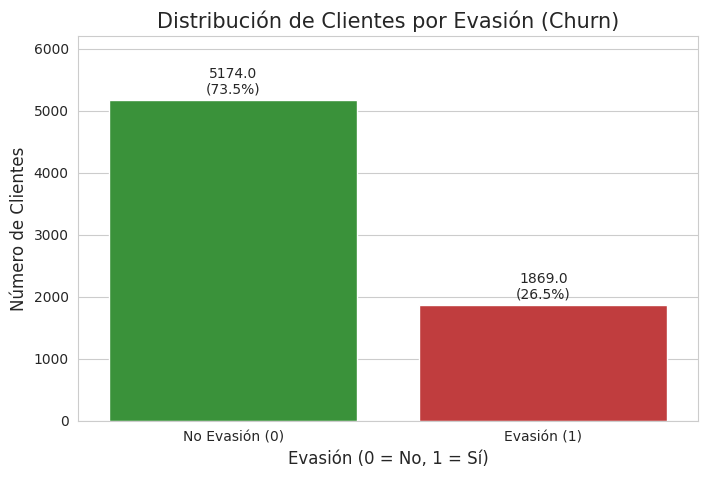

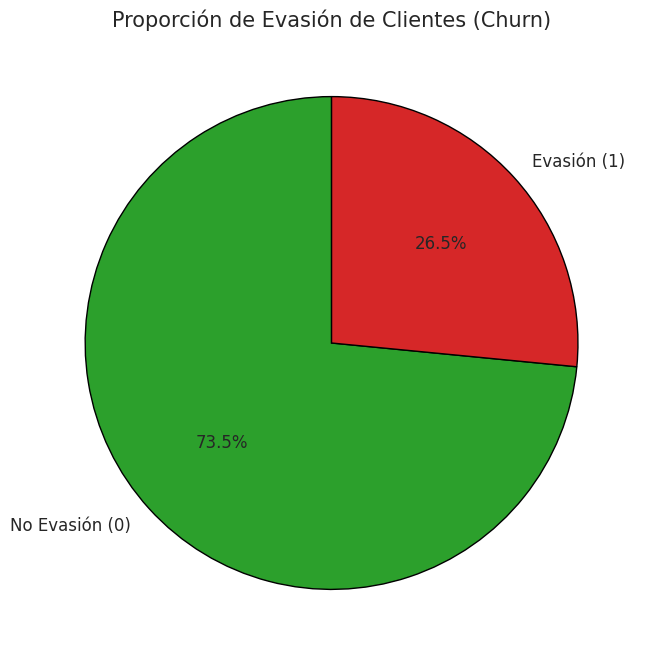


Análisis de la distribución de Evasión:
Del total de 7043 clientes analizados (después de la limpieza):
- 5174 clientes (73.46%) NO evadieron (Churn = 0).
- 1869 clientes (26.54%) SÍ evadieron (Churn = 1).
Esta visualización confirma la tasa de evasión calculada previamente y muestra claramente el desbalance entre las clases.

--- Fin: Paso 3.2 Distribución de Evasión (L - Load & Analysis) ---


In [20]:
# Importación de bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Paso: 3.2. Distribución de evasión
# Objetivo: Visualizar la proporción de clientes que evadieron y los que no.

print("\n--- Inicio: Paso 3.2 Distribución de Evasión (L - Load & Analysis) ---")

# Configuración general para los gráficos (opcional, para mejorar la estética)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de figura predeterminado

# 1. Calcular la cuenta de cada categoría en 'Churn'
# Recordar: Churn: 0 = No (permaneció), 1 = Yes (evadió)
churn_counts = df_telecom['Churn'].value_counts()
churn_percentage = df_telecom['Churn'].value_counts(normalize=True) * 100

print("\nDistribución de la variable 'Churn':")
print("Conteos:")
print(churn_counts)
print("\nPorcentajes:")
print(churn_percentage)

# 2. Visualización de la distribución de 'Churn'

# Gráfico de Barras
plt.figure(figsize=(8, 5))
ax_bar = sns.countplot(x='Churn', data=df_telecom, palette=['#2ca02c', '#d62728']) # Verde para No, Rojo para Yes
plt.title('Distribución de Clientes por Evasión (Churn)', fontsize=15)
plt.xlabel('Evasión (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Evasión (0)', 'Evasión (1)'])

# Añadir etiquetas con el número exacto y porcentaje encima de las barras
for p in ax_bar.patches:
    height = p.get_height()
    ax_bar.text(p.get_x() + p.get_width() / 2.,
            height + 50, # Ligeramente por encima de la barra
            f'{height}\n({height/len(df_telecom)*100:.1f}%)',
            ha="center", va="bottom", fontsize=10)
plt.ylim(0, max(churn_counts) * 1.2) # Ajustar límite Y para dar espacio a las etiquetas
plt.show()

# Gráfico de Torta (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(churn_counts,
        labels=['No Evasión (0)', 'Evasión (1)'],
        colors=['#2ca02c', '#d62728'],
        autopct='%1.1f%%', # Formato de porcentaje
        startangle=90,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12})
plt.title('Proporción de Evasión de Clientes (Churn)', fontsize=15)
plt.show()

print("\nAnálisis de la distribución de Evasión:")
print(f"Del total de {len(df_telecom)} clientes analizados (después de la limpieza):")
print(f"- {churn_counts.get(0, 0)} clientes ({churn_percentage.get(0, 0):.2f}%) NO evadieron (Churn = 0).")
print(f"- {churn_counts.get(1, 0)} clientes ({churn_percentage.get(1, 0):.2f}%) SÍ evadieron (Churn = 1).")
print("Esta visualización confirma la tasa de evasión calculada previamente y muestra claramente el desbalance entre las clases.")

print("\n--- Fin: Paso 3.2 Distribución de Evasión (L - Load & Analysis) ---")


--- Inicio: Paso 3.3 Recuento de Evasión por Variables Categóricas (L - Load & Analysis) ---


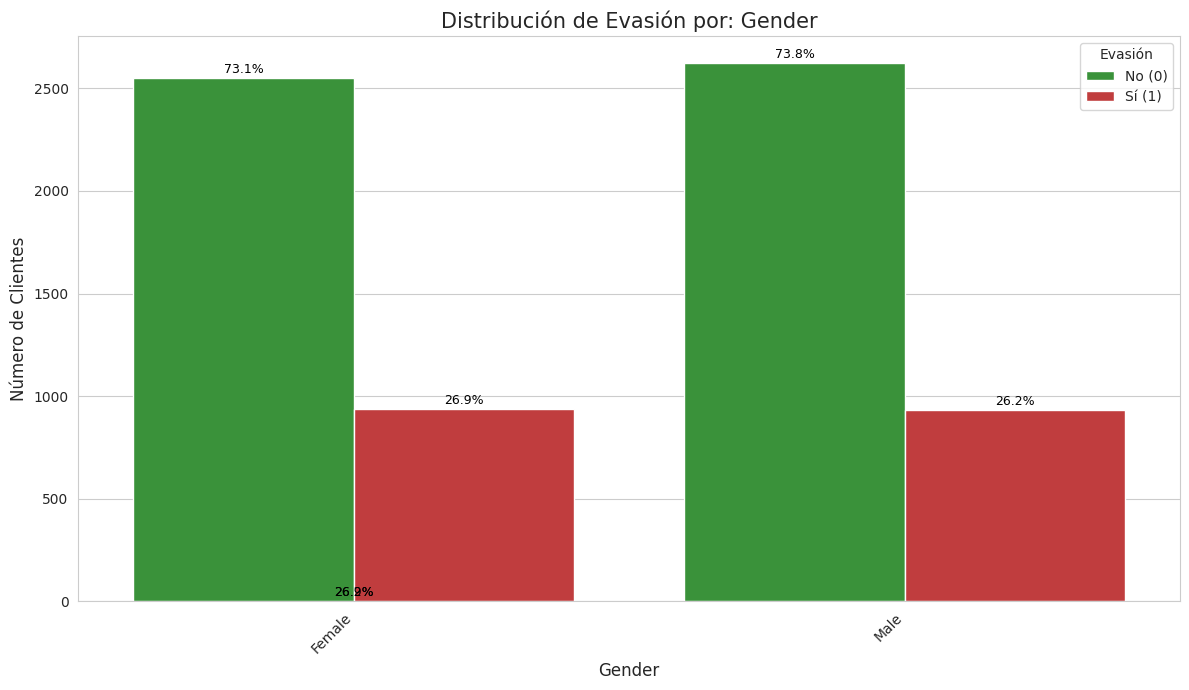


Análisis numérico para: Gender
Tabla de Contingencia (Conteos):
Churn      0     1  Total
gender                   
Female  2549   939   3488
Male    2625   930   3555
Total   5174  1869   7043

Porcentaje de Churn por Categoría:
        Churn_No (%)  Churn_Yes (%)
gender                             
Female         73.08          26.92
Male           73.84          26.16
--------------------------------------------------


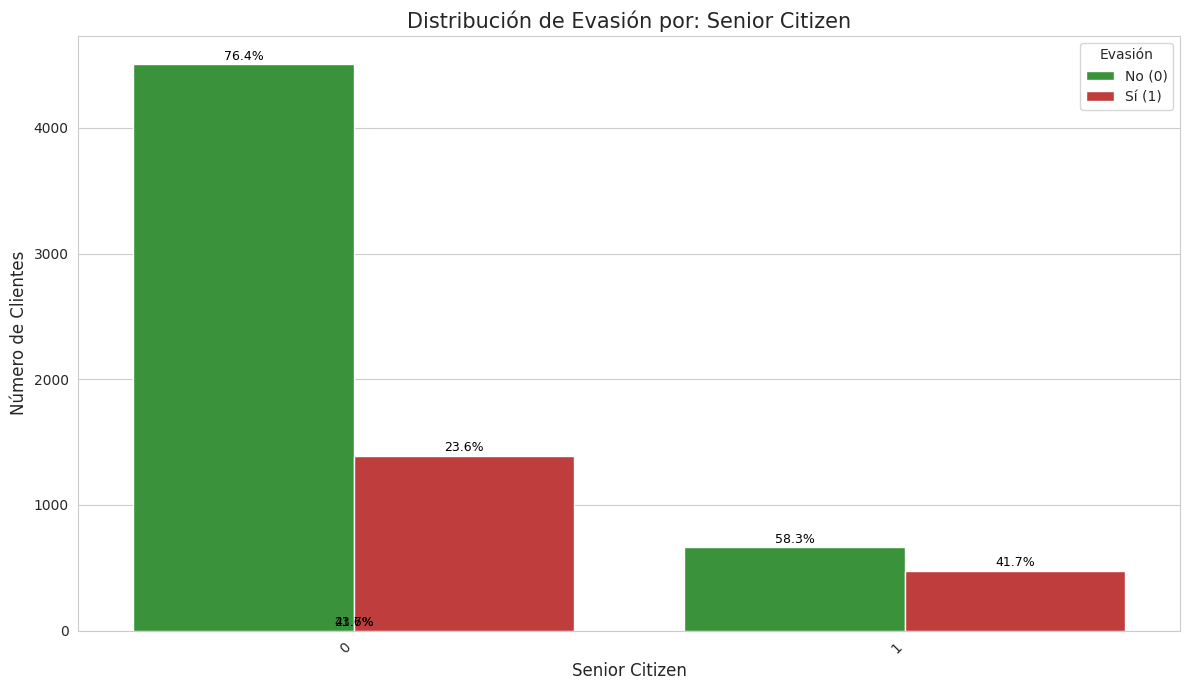


Análisis numérico para: Senior Citizen
Tabla de Contingencia (Conteos):
Churn              0     1  Total
senior_citizen                   
0               4508  1393   5901
1                666   476   1142
Total           5174  1869   7043

Porcentaje de Churn por Categoría:
                Churn_No (%)  Churn_Yes (%)
senior_citizen                             
0                      76.39          23.61
1                      58.32          41.68
--------------------------------------------------


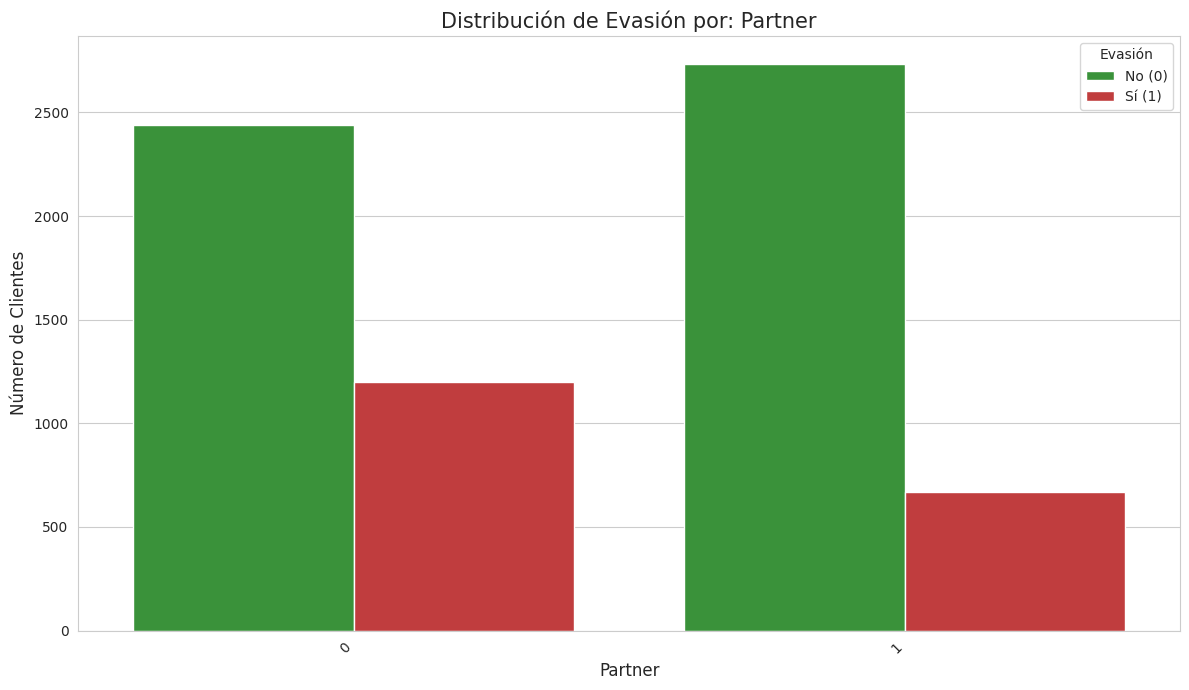


Análisis numérico para: Partner
Tabla de Contingencia (Conteos):
Churn       0     1  Total
partner                   
0        2441  1200   3641
1        2733   669   3402
Total    5174  1869   7043

Porcentaje de Churn por Categoría:
         Churn_No (%)  Churn_Yes (%)
partner                             
0               67.04          32.96
1               80.34          19.66
--------------------------------------------------


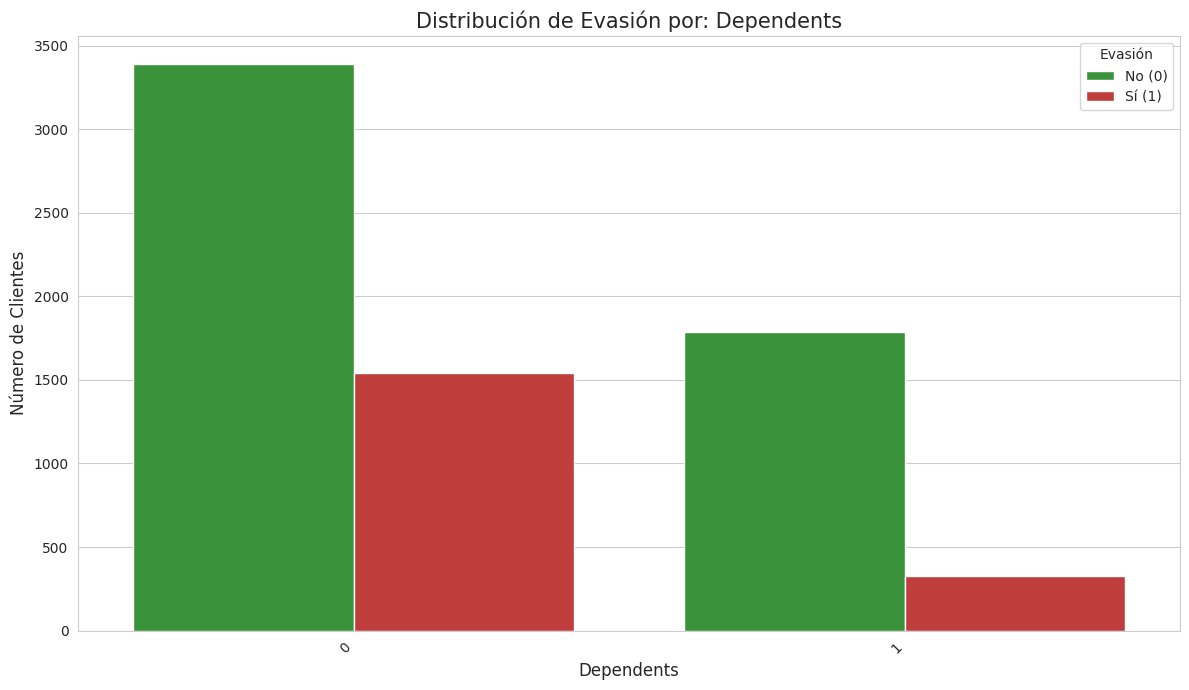


Análisis numérico para: Dependents
Tabla de Contingencia (Conteos):
Churn          0     1  Total
dependents                   
0           3390  1543   4933
1           1784   326   2110
Total       5174  1869   7043

Porcentaje de Churn por Categoría:
            Churn_No (%)  Churn_Yes (%)
dependents                             
0                  68.72          31.28
1                  84.55          15.45
--------------------------------------------------


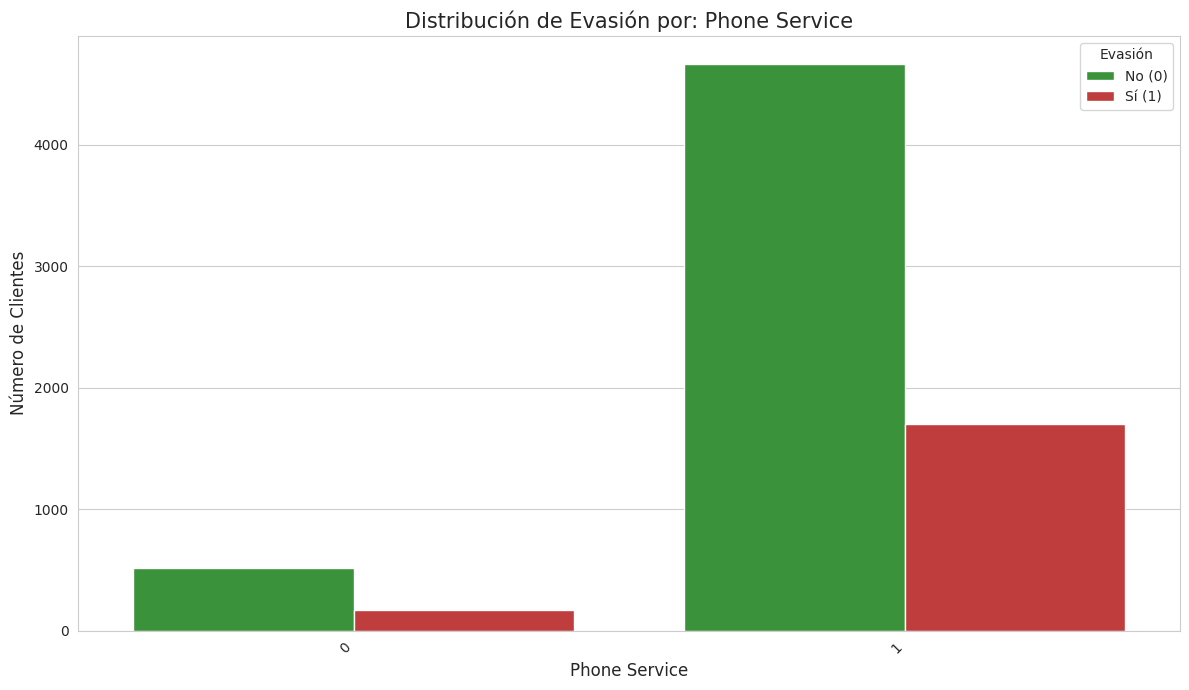


Análisis numérico para: Phone Service
Tabla de Contingencia (Conteos):
Churn             0     1  Total
phone_service                   
0               512   170    682
1              4662  1699   6361
Total          5174  1869   7043

Porcentaje de Churn por Categoría:
               Churn_No (%)  Churn_Yes (%)
phone_service                             
0                     75.07          24.93
1                     73.29          26.71
--------------------------------------------------


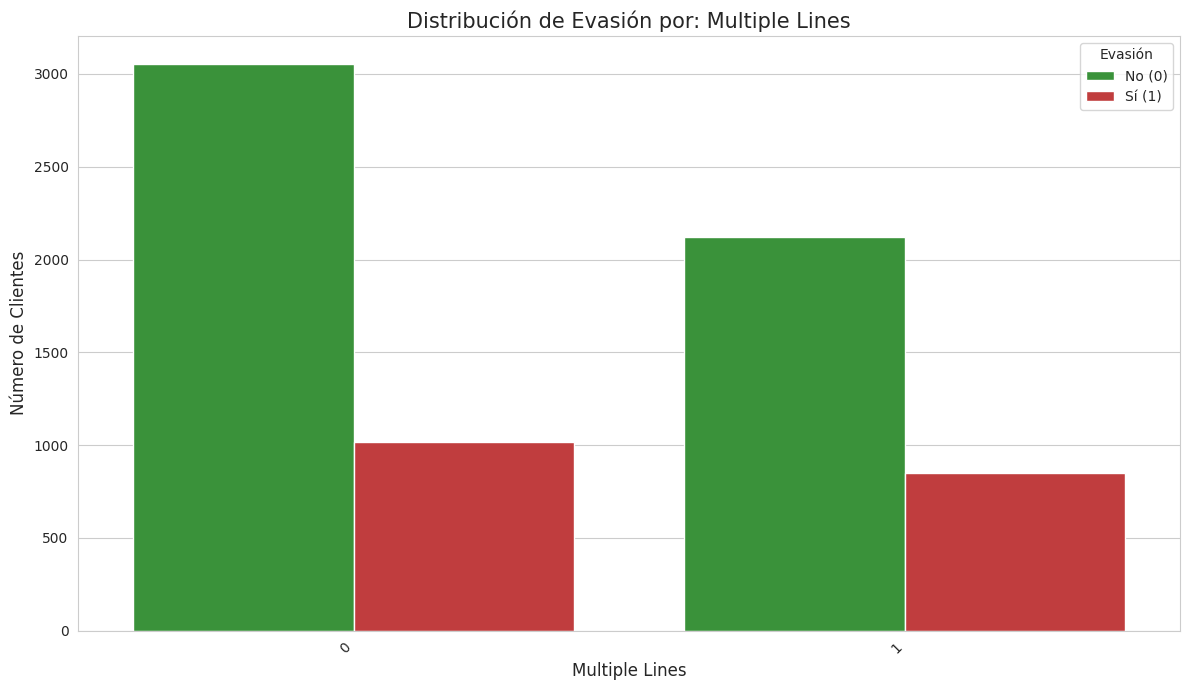


Análisis numérico para: Multiple Lines
Tabla de Contingencia (Conteos):
Churn              0     1  Total
multiple_lines                   
0               3053  1019   4072
1               2121   850   2971
Total           5174  1869   7043

Porcentaje de Churn por Categoría:
                Churn_No (%)  Churn_Yes (%)
multiple_lines                             
0                      74.98          25.02
1                      71.39          28.61
--------------------------------------------------


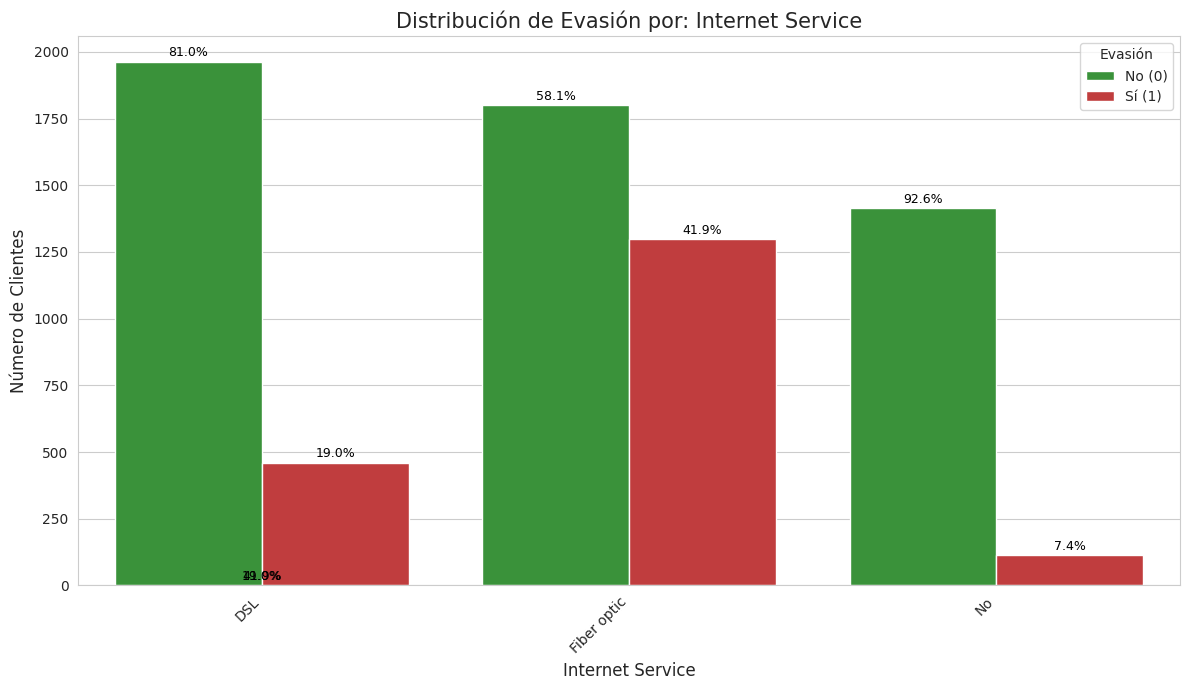


Análisis numérico para: Internet Service
Tabla de Contingencia (Conteos):
Churn                0     1  Total
internet_service                   
DSL               1962   459   2421
Fiber optic       1799  1297   3096
No                1413   113   1526
Total             5174  1869   7043

Porcentaje de Churn por Categoría:
                  Churn_No (%)  Churn_Yes (%)
internet_service                             
DSL                      81.04          18.96
Fiber optic              58.11          41.89
No                       92.60           7.40
--------------------------------------------------


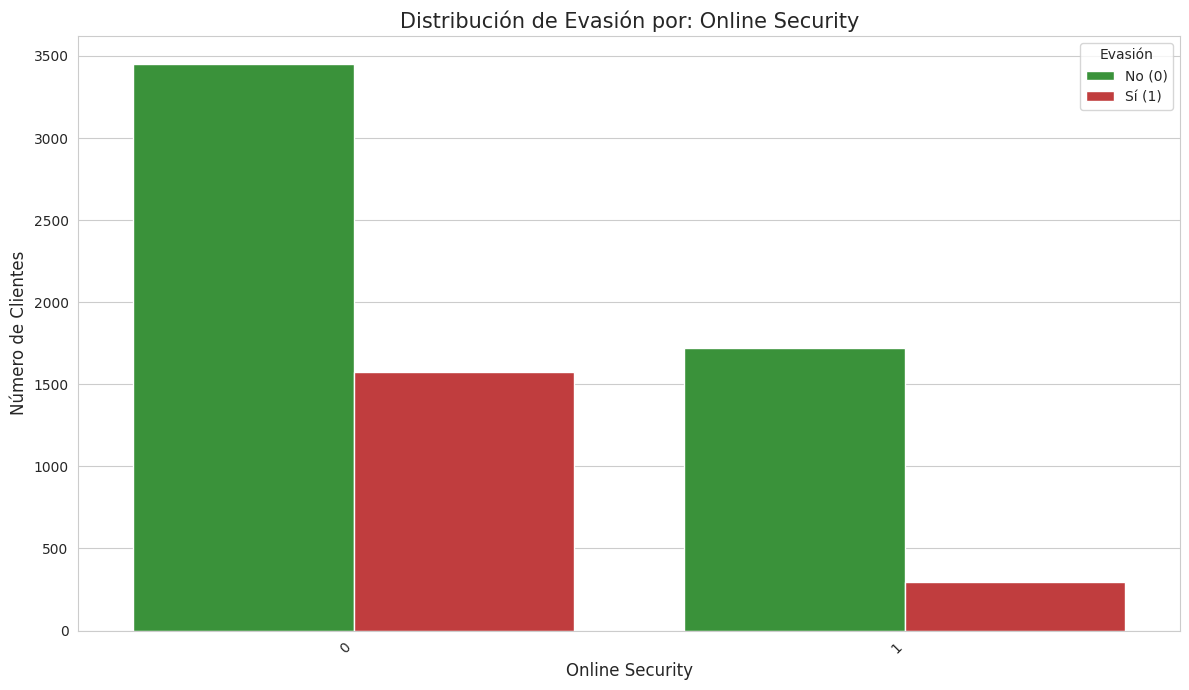


Análisis numérico para: Online Security
Tabla de Contingencia (Conteos):
Churn               0     1  Total
online_security                   
0                3450  1574   5024
1                1724   295   2019
Total            5174  1869   7043

Porcentaje de Churn por Categoría:
                 Churn_No (%)  Churn_Yes (%)
online_security                             
0                       68.67          31.33
1                       85.39          14.61
--------------------------------------------------


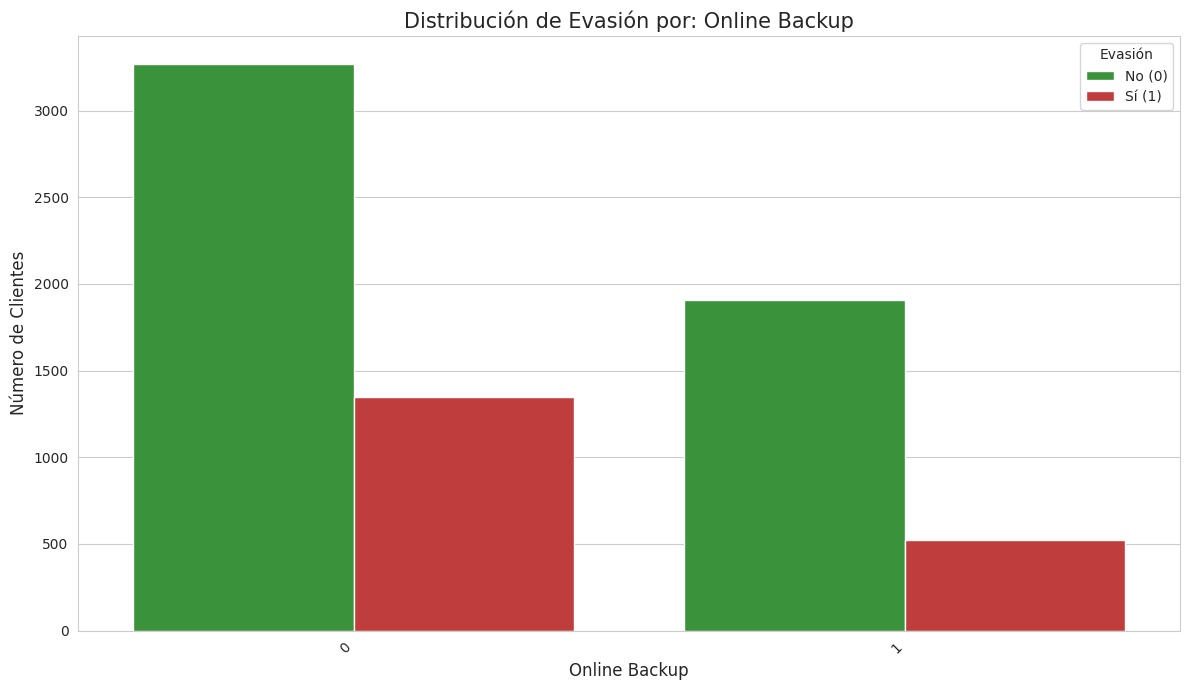


Análisis numérico para: Online Backup
Tabla de Contingencia (Conteos):
Churn             0     1  Total
online_backup                   
0              3268  1346   4614
1              1906   523   2429
Total          5174  1869   7043

Porcentaje de Churn por Categoría:
               Churn_No (%)  Churn_Yes (%)
online_backup                             
0                     70.83          29.17
1                     78.47          21.53
--------------------------------------------------


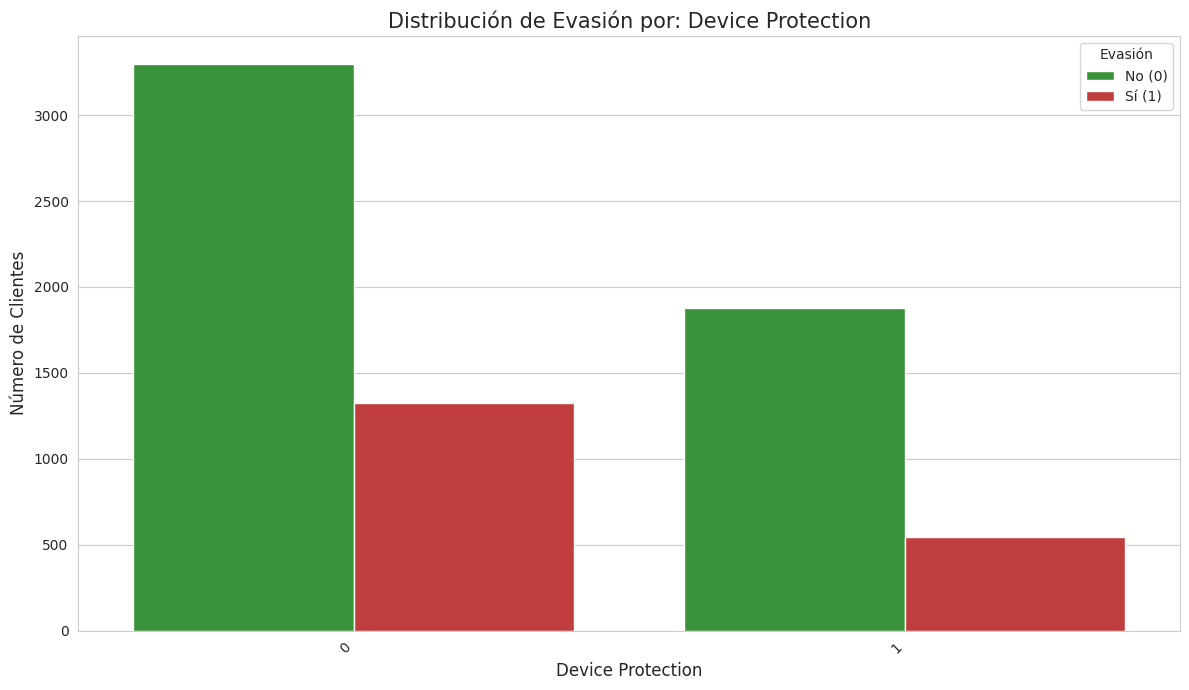


Análisis numérico para: Device Protection
Tabla de Contingencia (Conteos):
Churn                 0     1  Total
device_protection                   
0                  3297  1324   4621
1                  1877   545   2422
Total              5174  1869   7043

Porcentaje de Churn por Categoría:
                   Churn_No (%)  Churn_Yes (%)
device_protection                             
0                         71.35          28.65
1                         77.50          22.50
--------------------------------------------------


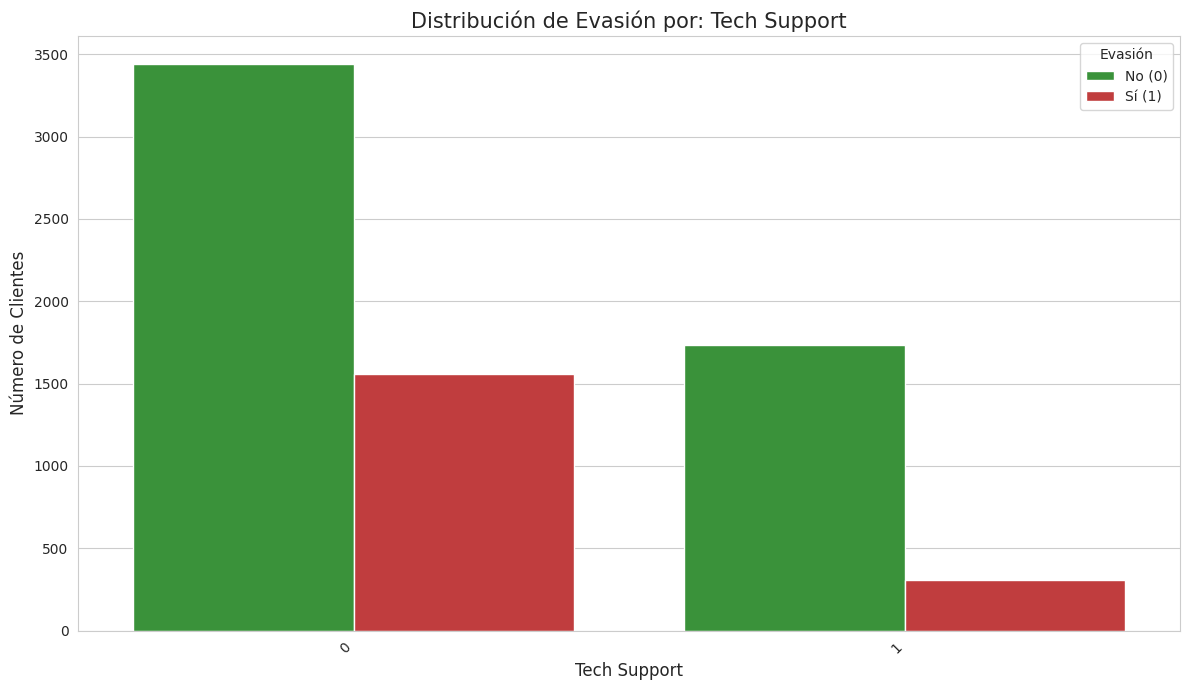


Análisis numérico para: Tech Support
Tabla de Contingencia (Conteos):
Churn            0     1  Total
tech_support                   
0             3440  1559   4999
1             1734   310   2044
Total         5174  1869   7043

Porcentaje de Churn por Categoría:
              Churn_No (%)  Churn_Yes (%)
tech_support                             
0                    68.81          31.19
1                    84.83          15.17
--------------------------------------------------


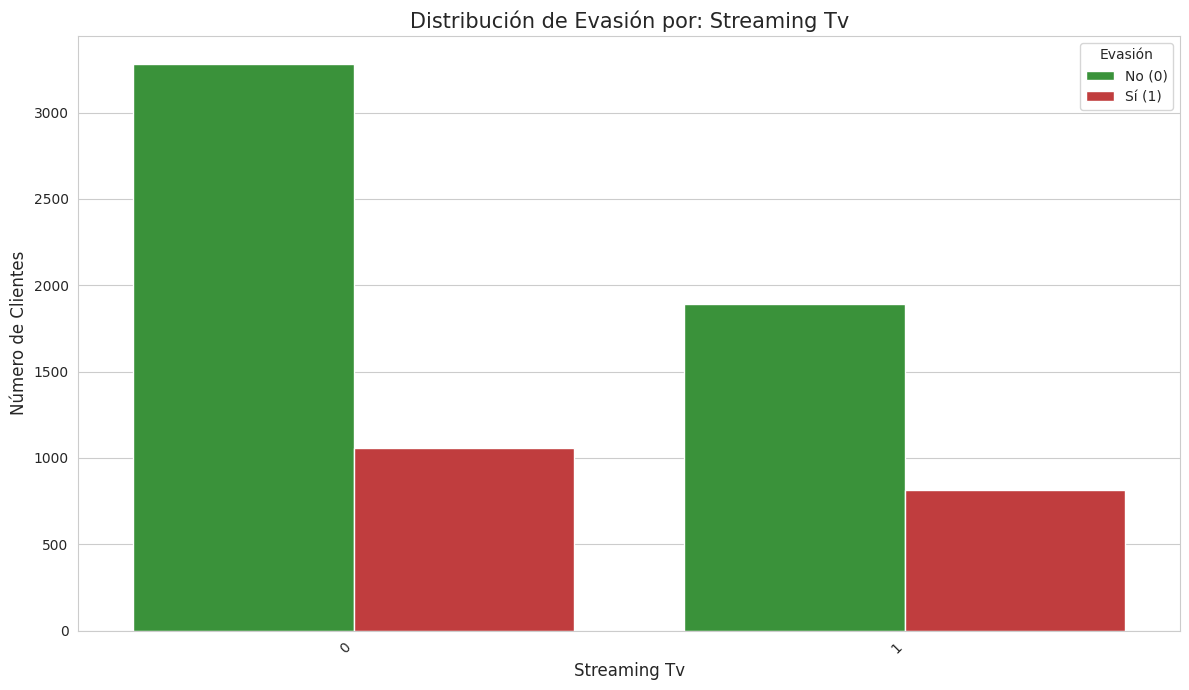


Análisis numérico para: Streaming Tv
Tabla de Contingencia (Conteos):
Churn            0     1  Total
streaming_tv                   
0             3281  1055   4336
1             1893   814   2707
Total         5174  1869   7043

Porcentaje de Churn por Categoría:
              Churn_No (%)  Churn_Yes (%)
streaming_tv                             
0                    75.67          24.33
1                    69.93          30.07
--------------------------------------------------


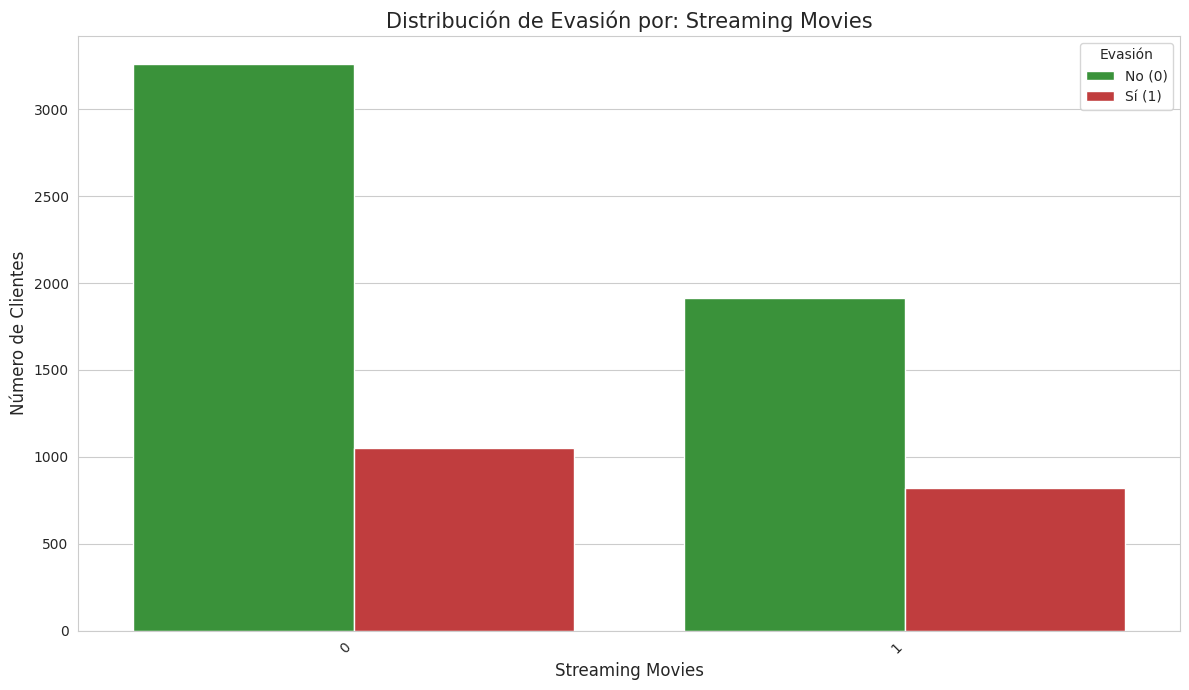


Análisis numérico para: Streaming Movies
Tabla de Contingencia (Conteos):
Churn                0     1  Total
streaming_movies                   
0                 3260  1051   4311
1                 1914   818   2732
Total             5174  1869   7043

Porcentaje de Churn por Categoría:
                  Churn_No (%)  Churn_Yes (%)
streaming_movies                             
0                        75.62          24.38
1                        70.06          29.94
--------------------------------------------------


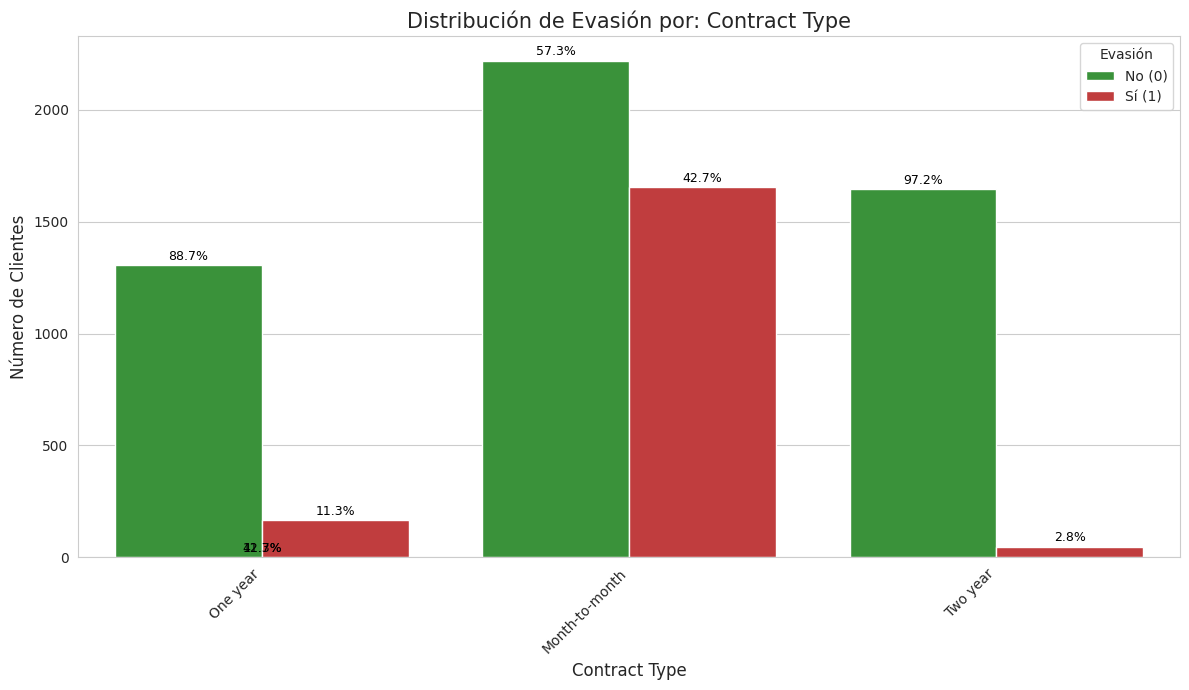


Análisis numérico para: Contract Type
Tabla de Contingencia (Conteos):
Churn              0     1  Total
contract_type                    
Month-to-month  2220  1655   3875
One year        1307   166   1473
Two year        1647    48   1695
Total           5174  1869   7043

Porcentaje de Churn por Categoría:
                Churn_No (%)  Churn_Yes (%)
contract_type                              
Month-to-month         57.29          42.71
One year               88.73          11.27
Two year               97.17           2.83
--------------------------------------------------


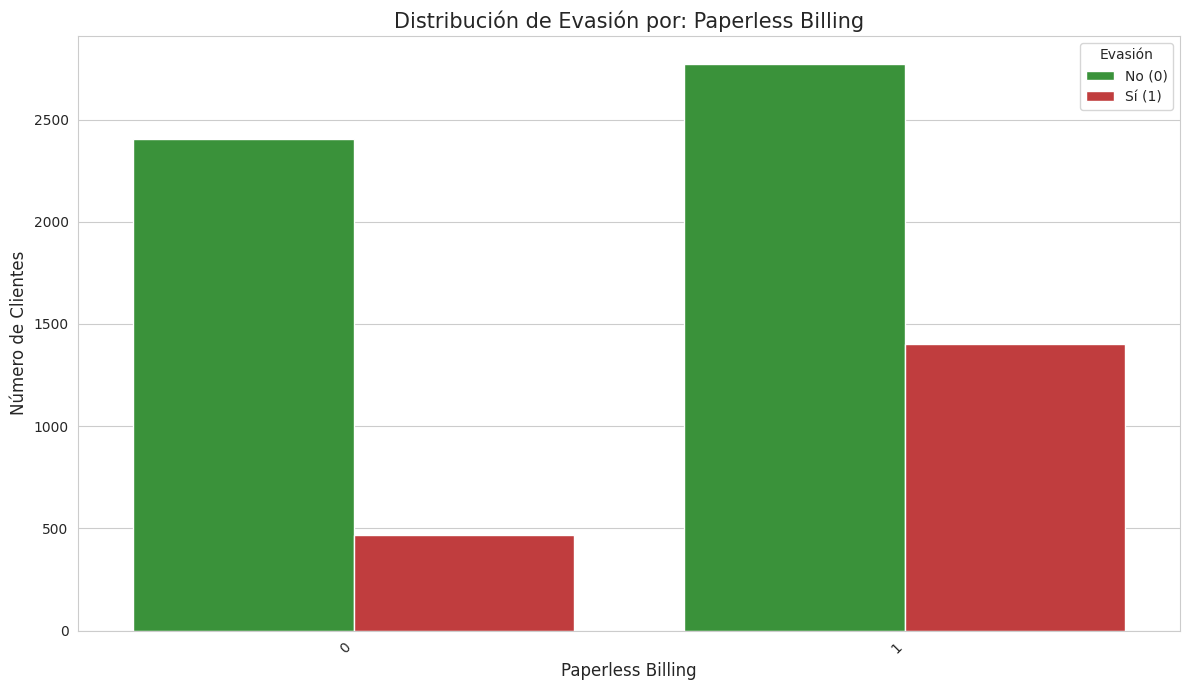


Análisis numérico para: Paperless Billing
Tabla de Contingencia (Conteos):
Churn                 0     1  Total
paperless_billing                   
0                  2403   469   2872
1                  2771  1400   4171
Total              5174  1869   7043

Porcentaje de Churn por Categoría:
                   Churn_No (%)  Churn_Yes (%)
paperless_billing                             
0                         83.67          16.33
1                         66.43          33.57
--------------------------------------------------


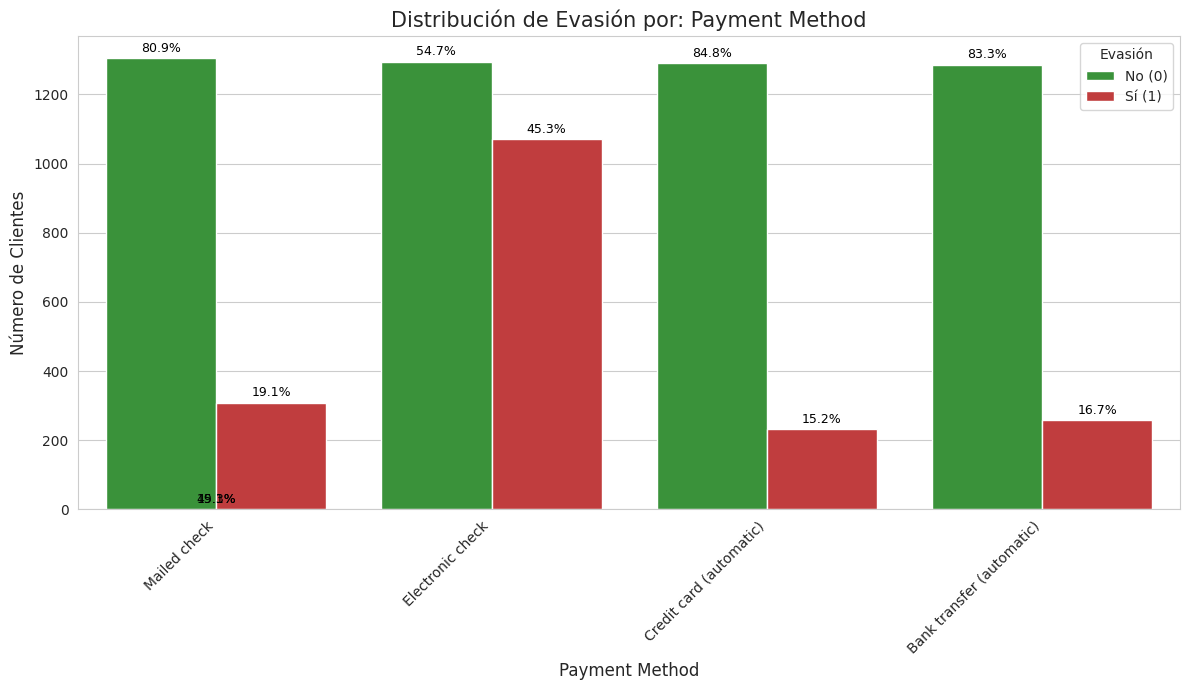


Análisis numérico para: Payment Method
Tabla de Contingencia (Conteos):
Churn                         0     1  Total
payment_method                              
Bank transfer (automatic)  1286   258   1544
Credit card (automatic)    1290   232   1522
Electronic check           1294  1071   2365
Mailed check               1304   308   1612
Total                      5174  1869   7043

Porcentaje de Churn por Categoría:
                           Churn_No (%)  Churn_Yes (%)
payment_method                                        
Bank transfer (automatic)         83.29          16.71
Credit card (automatic)           84.76          15.24
Electronic check                  54.71          45.29
Mailed check                      80.89          19.11
--------------------------------------------------

--- Fin: Paso 3.3 Recuento de Evasión por Variables Categóricas (L - Load & Analysis) ---


In [21]:
# Paso: 3.3. Recuento de evasión por variables categóricas
# Objetivo: Explorar cómo se distribuye la evasión según diferentes variables categóricas.

print("\n--- Inicio: Paso 3.3 Recuento de Evasión por Variables Categóricas (L - Load & Analysis) ---")

# Lista de columnas categóricas relevantes para el análisis de evasión.
# Se incluyen también 'senior_citizen' ya que, aunque numérica (0/1), representa una categoría.
# Se excluyen columnas con demasiadas categorías únicas para un gráfico de barras simple (si las hubiera).
categorical_features_for_churn_analysis = [
    'gender', 'senior_citizen', 'partner', 'dependents',
    'phone_service', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'contract_type', 'paperless_billing', 'payment_method'
]

# Iterar sobre cada característica categórica y visualizar la distribución de Churn
for feature in categorical_features_for_churn_analysis:
    if feature in df_telecom.columns:
        plt.figure(figsize=(12, 7)) # Ajustar tamaño para mejor visualización
        ax = sns.countplot(x=feature, hue='Churn', data=df_telecom, palette=['#2ca02c', '#d62728'])
        plt.title(f'Distribución de Evasión por: {feature.replace("_", " ").title()}', fontsize=15)
        plt.xlabel(feature.replace("_", " ").title(), fontsize=12)
        plt.ylabel('Número de Clientes', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas si son largas
        plt.legend(title='Evasión', labels=['No (0)', 'Sí (1)'])

        # Añadir porcentajes de churn dentro de cada categoría
        # Primero, calcular la tasa de churn por categoría de la característica
        churn_rate_per_category = df_telecom.groupby(feature)['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

        # Anotar los porcentajes en las barras
        for p in ax.patches:
            height = p.get_height()
            # Determinar si la barra es para Churn=0 o Churn=1
            # El hue de Seaborn alterna. Si hay N categorías en x, las primeras N barras son para hue=0, las siguientes N para hue=1
            num_categories_x = len(df_telecom[feature].unique())
            current_x_category_index = (ax.patches.index(p) % num_categories_x)
            current_x_category_value = ax.get_xticklabels()[current_x_category_index].get_text()

            # Encontrar el valor correcto de 'hue' para la barra actual.
            # Las primeras len(unique_x_values) barras corresponden al primer valor de hue.
            # Las siguientes len(unique_x_values) barras corresponden al segundo valor de hue.
            current_hue_value = 0 if ax.patches.index(p) < num_categories_x else 1

            # Filtrar para obtener el porcentaje correcto
            try:
                # La conversión de current_x_category_value a int/float es necesaria si la columna original es numérica (ej: senior_citizen)
                # y los xticklabels son strings de esos números.
                # Para 'senior_citizen', los xticklabels son '0' y '1'.
                if feature == 'senior_citizen': # o cualquier otra columna numérica convertida a categórica en el gráfico
                    current_x_category_value_typed = int(current_x_category_value)
                else:
                    current_x_category_value_typed = current_x_category_value

                percentage = churn_rate_per_category[
                    (churn_rate_per_category[feature] == current_x_category_value_typed) &
                    (churn_rate_per_category['Churn'] == current_hue_value)
                ]['percent'].iloc[0]

                ax.text(p.get_x() + p.get_width() / 2.,
                        height + 10, # Ligeramente por encima de la barra
                        f'{percentage:.1f}%', # Mostrar porcentaje
                        ha="center", va="bottom", fontsize=9, color='black')
            except (IndexError, KeyError) as e:
                # print(f"Advertencia: No se pudo encontrar el porcentaje para {feature}={current_x_category_value}, Churn={current_hue_value}. Error: {e}")
                # Esta excepción puede ocurrir si alguna combinación no existe o por cómo se manejan los índices.
                # Para simplificar, si no se encuentra, no se anota.
                pass
            except ValueError as ve:
                # print(f"Advertencia: Error de valor al convertir {current_x_category_value} para {feature}. Error: {ve}")
                pass


        plt.tight_layout() # Ajustar layout para evitar solapamientos
        plt.show()

        # Imprimir la tabla de contingencia y tasas de churn para referencia numérica
        print(f"\nAnálisis numérico para: {feature.replace('_', ' ').title()}")
        contingency_table = pd.crosstab(df_telecom[feature], df_telecom['Churn'], margins=True, margins_name="Total")
        contingency_table_percent = pd.crosstab(df_telecom[feature], df_telecom['Churn'], normalize='index').mul(100).round(2)
        contingency_table_percent.columns = ['Churn_No (%)', 'Churn_Yes (%)']
        print("Tabla de Contingencia (Conteos):")
        print(contingency_table)
        print("\nPorcentaje de Churn por Categoría:")
        print(contingency_table_percent)
        print("-" * 50)

    else:
        print(f"Advertencia: La columna '{feature}' no se encontró en el DataFrame.")


print("\n--- Fin: Paso 3.3 Recuento de Evasión por Variables Categóricas (L - Load & Analysis) ---")


--- Inicio: Paso 3.4 Conteo de Evasión por Variables Numéricas (L - Load & Analysis) ---

Análisis de Evasión por: Tenure Months

Estadísticas Descriptivas (Media y Mediana) por grupo de Churn:
            mean  median
Churn                   
0      37.569965    38.0
1      17.979133    10.0


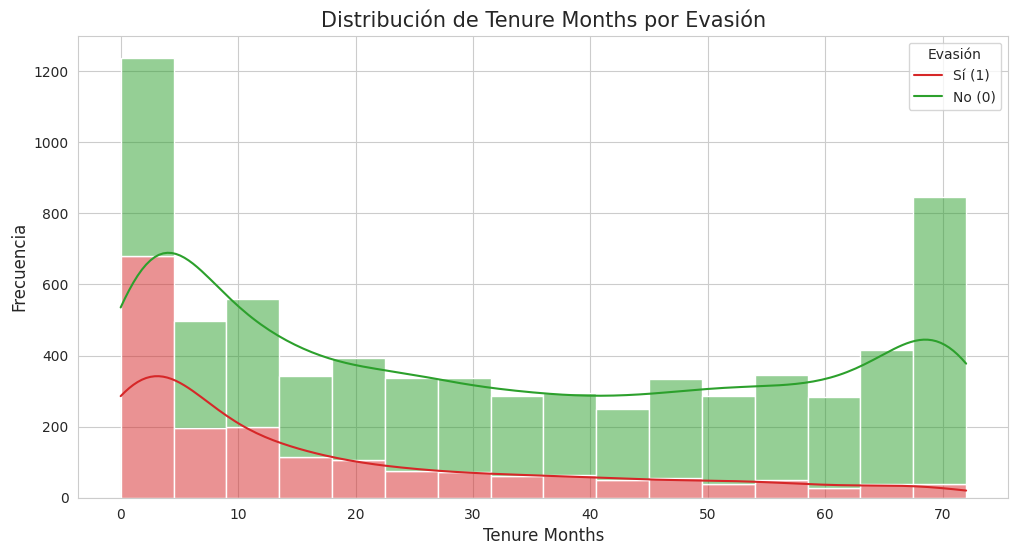

<ipython-input-22-1ac5747a10d3>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_telecom, palette=['#2ca02c', '#d62728'])


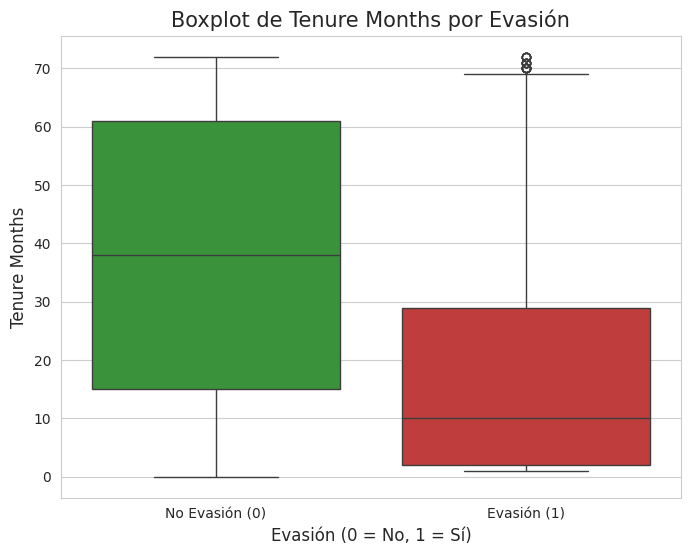

----------------------------------------------------------------------

Análisis de Evasión por: Monthly Charges

Estadísticas Descriptivas (Media y Mediana) por grupo de Churn:
            mean  median
Churn                   
0      61.265124  64.425
1      74.441332  79.650


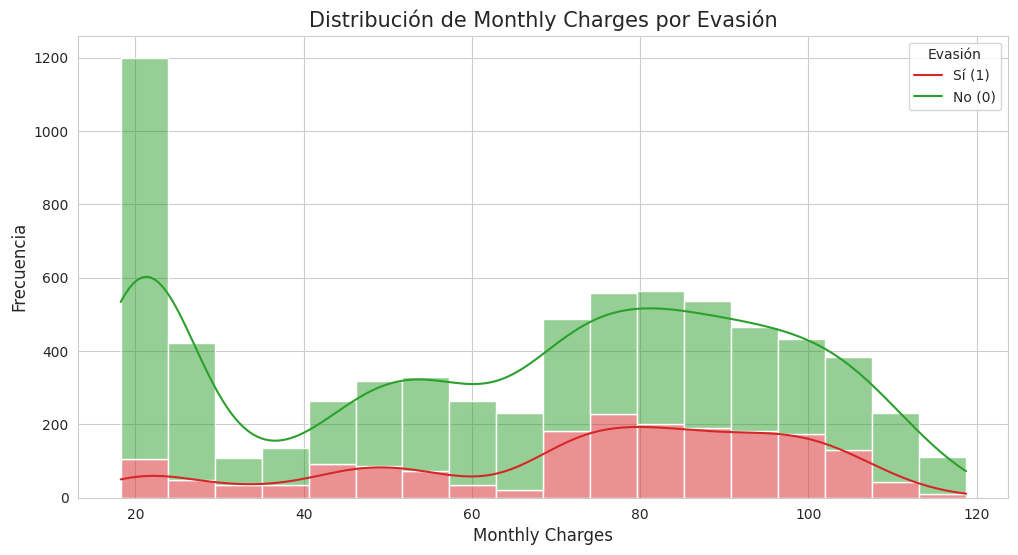

<ipython-input-22-1ac5747a10d3>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_telecom, palette=['#2ca02c', '#d62728'])


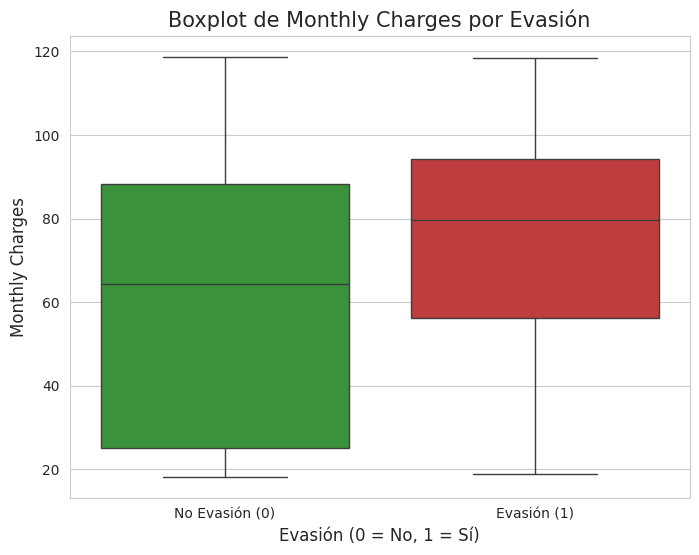

----------------------------------------------------------------------

Análisis de Evasión por: Total Charges

Estadísticas Descriptivas (Media y Mediana) por grupo de Churn:
              mean    median
Churn                       
0      2549.911442  1679.525
1      1531.796094   703.550


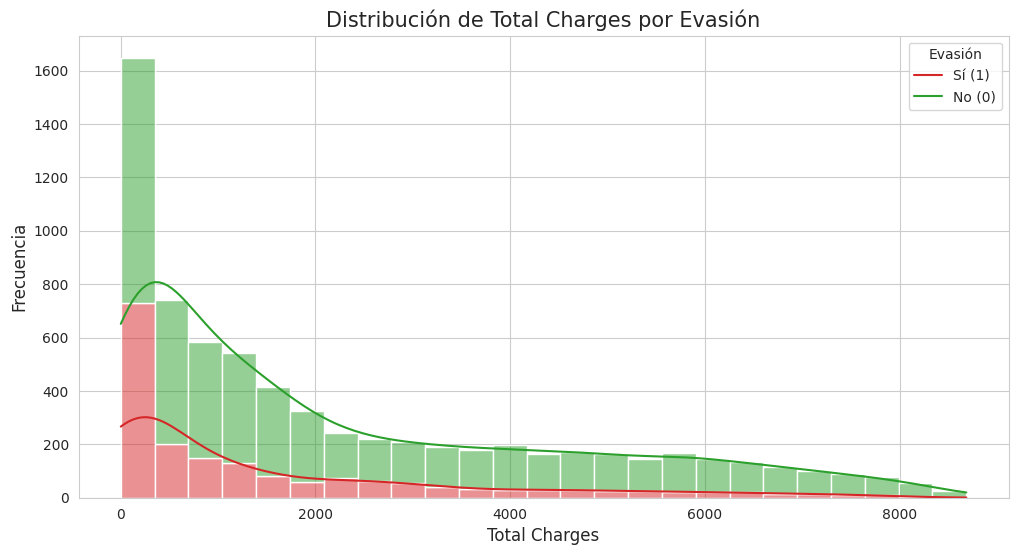

<ipython-input-22-1ac5747a10d3>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_telecom, palette=['#2ca02c', '#d62728'])


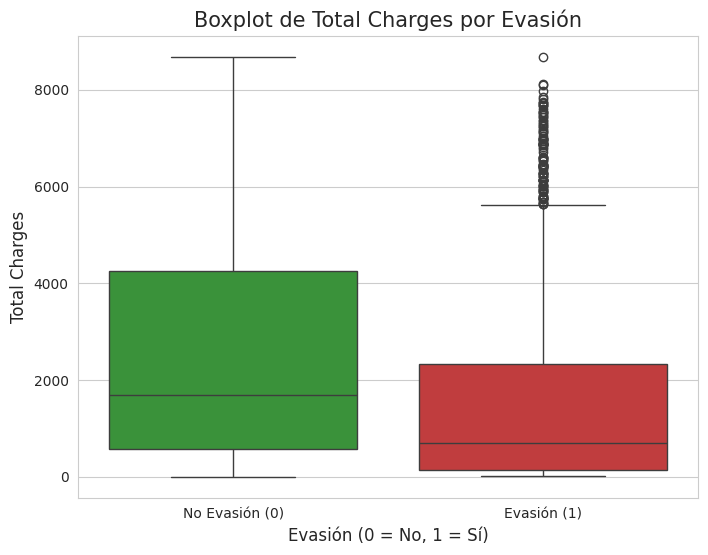

----------------------------------------------------------------------

Análisis de Evasión por: Daily Charges

Estadísticas Descriptivas (Media y Mediana) por grupo de Churn:
           mean  median
Churn                  
0      2.042171  2.1475
1      2.481378  2.6550


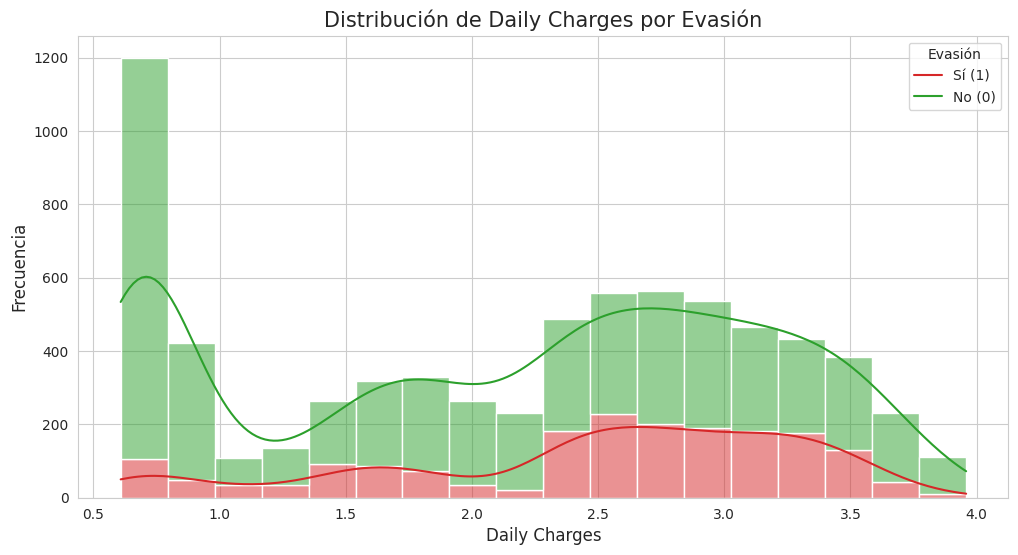

<ipython-input-22-1ac5747a10d3>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_telecom, palette=['#2ca02c', '#d62728'])


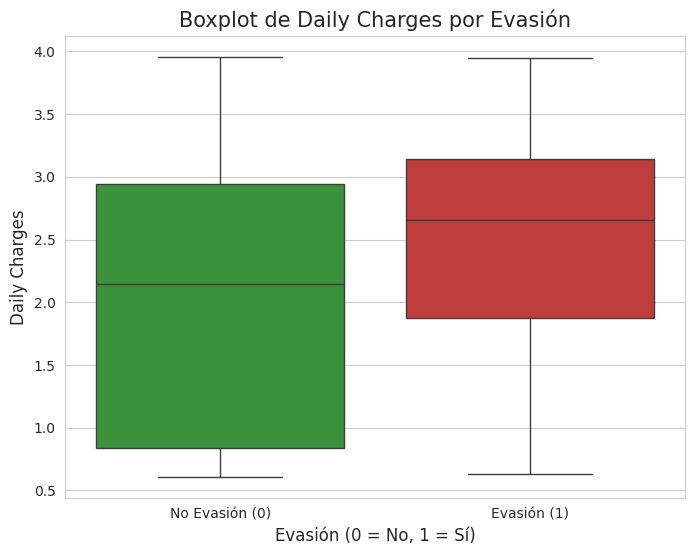

----------------------------------------------------------------------

--- Fin: Paso 3.4 Conteo de Evasión por Variables Numéricas (L - Load & Analysis) ---


In [22]:
# Paso: 3.4. Conteo de evasión por variables numéricas
# Objetivo: Explorar cómo las variables numéricas se distribuyen entre clientes que evadieron y los que no.

print("\n--- Inicio: Paso 3.4 Conteo de Evasión por Variables Numéricas (L - Load & Analysis) ---")

# Lista de columnas numéricas continuas relevantes para el análisis de evasión.
# Se excluyen las que son esencialmente categóricas (0/1) aunque sean numéricas,
# ya que su relación con Churn se exploró en el paso anterior (e.g., senior_citizen).
numerical_features_for_churn_analysis = [
    'tenure_months',
    'monthly_charges',
    'total_charges',
    'daily_charges'
]

# Iterar sobre cada característica numérica y visualizar la distribución de Churn
for feature in numerical_features_for_churn_analysis:
    if feature in df_telecom.columns:
        print(f"\nAnálisis de Evasión por: {feature.replace('_', ' ').title()}")

        # 1. Estadísticas Descriptivas por Churn
        print("\nEstadísticas Descriptivas (Media y Mediana) por grupo de Churn:")
        stats_by_churn = df_telecom.groupby('Churn')[feature].agg(['mean', 'median'])
        print(stats_by_churn)

        # 2. Visualización con Histogramas y KDE (Kernel Density Estimate)
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df_telecom, x=feature, hue='Churn', kde=True,
                     palette=['#2ca02c', '#d62728'], multiple="stack")
        plt.title(f'Distribución de {feature.replace("_", " ").title()} por Evasión', fontsize=15)
        plt.xlabel(feature.replace("_", " ").title(), fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.legend(title='Evasión', labels=['Sí (1)', 'No (0)']) # Orden de leyenda para histplot con hue
        plt.show()

        # 3. Visualización con Boxplots
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Churn', y=feature, data=df_telecom, palette=['#2ca02c', '#d62728'])
        plt.title(f'Boxplot de {feature.replace("_", " ").title()} por Evasión', fontsize=15)
        plt.xlabel('Evasión (0 = No, 1 = Sí)', fontsize=12)
        plt.ylabel(feature.replace("_", " ").title(), fontsize=12)
        plt.xticks(ticks=[0, 1], labels=['No Evasión (0)', 'Evasión (1)'])
        plt.show()
        print("-" * 70)

    else:
        print(f"Advertencia: La columna '{feature}' no se encontró en el DataFrame.")

print("\n--- Fin: Paso 3.4 Conteo de Evasión por Variables Numéricas (L - Load & Analysis) ---")

# Informe Final: Análisis de Evasión de Clientes - Telecom X

## 🔹 Introducción

El presente informe detalla el análisis realizado sobre los datos de clientes de Telecom X con el objetivo principal de comprender los factores que contribuyen a la evasión de clientes (Churn). La empresa enfrenta una tasa de cancelaciones que requiere ser investigada para desarrollar estrategias efectivas de retención. Este análisis se enfoca en el proceso de Extracción, Transformación y Carga (ETL) de los datos, seguido de un Análisis Exploratorio de Datos (EDA) para identificar patrones y generar insights.

## 🔹 Limpieza y Tratamiento de Datos (Proceso ETL)

El proceso de preparación de datos fue fundamental para asegurar la calidad y fiabilidad del análisis. Las etapas principales fueron:

1.  **Extracción (E):**
    *   Los datos fueron extraídos directamente desde la API proporcionada, la cual entregó la información en formato JSON.
    *   Estos datos JSON fueron cargados y convertidos a un DataFrame de Pandas para su manipulación. Inicialmente, se cargaron 7267 registros.

2.  **Transformación (T):**
    *   **Conocimiento del Dataset:** Se exploró la estructura inicial, identificando columnas con datos anidados (diccionarios) como `customer`, `phone`, `internet`, y `account`.
    *   **Comprobación de Incoherencias:**
        *   Se identificaron 224 registros con la variable `Churn` como un string vacío (`''`).
        *   La columna `account.Charges.Total` (posteriormente `total_charges`) se identificó como tipo string, necesitando conversión a numérico.
    *   **Manejo de Inconsistencias y Limpieza:**
        *   Los registros con `Churn` vacío fueron eliminados, resultando en 7043 registros válidos para el análisis.
        *   Las columnas que contenían diccionarios (`customer`, `phone`, `internet`, `account`) fueron aplanadas, expandiendo sus atributos internos a nuevas columnas individuales.
        *   La columna `total_charges` fue convertida a tipo numérico. Los valores que no pudieron ser convertidos (11 casos) correspondían a clientes con `tenure_months = 0` y fueron imputados con 0.0, asumiendo que son clientes nuevos sin cargos totales acumulados.
        *   La columna `Churn` fue convertida a formato numérico (0 para 'No', 1 para 'Yes').
    *   **Creación de Nuevas Características:**
        *   Se creó la columna `daily_charges` dividiendo `monthly_charges` por 30, para obtener una perspectiva de gasto diario.
    *   **Estandarización (Opcional pero Realizado):**
        *   Se renombraron columnas para mayor claridad y consistencia (e.g., `customer_gender` a `gender`).
        *   Columnas categóricas binarias (con valores 'Yes'/'No') fueron convertidas a formato numérico (1/0).
        *   Valores especiales como "No internet service" o "No phone service" en subcategorías de servicios fueron estandarizados a "No" y luego también convertidos a 1/0.
    *   El DataFrame final procesado contiene 7043 filas y 22 columnas, sin valores nulos y con tipos de datos adecuados para el análisis.

## 🔹 Análisis Exploratorio de Datos (EDA)

El EDA se centró en comprender la distribución de la evasión y su relación con diversas características de los clientes. **Las visualizaciones (gráficos) que respaldan este análisis se encuentran en las salidas de las celdas de código correspondientes a los pasos 3.2, 3.3 y 3.4 de este notebook.**

1.  **Análisis Descriptivo General:**
    *   Se calcularon estadísticas descriptivas para todas las variables. La tasa de evasión general (media de la columna `Churn`) se situó en aproximadamente **26.54%**.

2.  **Distribución de Evasión (ver gráficos del Paso 3.2):**
    *   Visualizaciones (gráficos de barras y de torta) confirmaron la proporción de clientes que evadieron (1869 clientes, 26.5%) frente a los que permanecieron (5174 clientes, 73.5%).

3.  **Evasión por Variables Categóricas (ver gráficos y tablas del Paso 3.3):**
    *   Se generaron gráficos de barras agrupados por `Churn` y tablas de contingencia para cada variable categórica relevante. Los hallazgos más significativos incluyen:
        *   **Contract Type:** Los clientes con contrato "Month-to-month" muestran la tasa de churn más alta (42.71%), mientras que los contratos "Two year" tienen la más baja (2.83%).
        *   **Internet Service:** Clientes con "Fiber optic" tienen una alta tasa de churn (41.89%), en contraste con "DSL" (18.96%) y aquellos sin servicio de internet ("No", 7.40%).
        *   **Payment Method:** El método "Electronic check" está asociado con una tasa de churn muy elevada (45.29%).
        *   **Senior Citizen:** Los adultos mayores tienen una tasa de churn del 41.68%, frente al 23.61% de los no adultos mayores.
        *   **Dependents y Partner:** Clientes sin dependientes y sin pareja tienden a evadir más.
        *   **Servicios Adicionales (Online Security, Tech Support, etc.):** La ausencia de estos servicios se correlaciona con tasas de churn más altas. Por ejemplo, sin "Online Security" el churn es del 31.33%, mientras que con este servicio es del 14.61%.

4.  **Evasión por Variables Numéricas (ver gráficos y estadísticas del Paso 3.4):**
    *   Se utilizaron histogramas, KDE plots y boxplots para visualizar la distribución de variables numéricas (`tenure_months`, `monthly_charges`, `total_charges`, `daily_charges`) segmentadas por `Churn`.
        *   **Tenure Months:** Los clientes que evaden tienen una antigüedad significativamente menor (media de 18 meses vs. 37.6 meses para los que no evaden).
        *   **Monthly Charges / Daily Charges:** Los clientes que evaden tienden a tener cargos mensuales y diarios más altos (media de $74.44 mensuales vs. $61.27).
        *   **Total Charges:** Los clientes que no evaden acumulan cargos totales mucho mayores, lo cual es consistente con su mayor antigüedad.

## 🔹 Conclusiones e Insights

El análisis de los datos de Telecom X ha revelado perfiles y factores clave asociados con una mayor probabilidad de evasión de clientes:

1.  **Vulnerabilidad Contractual y de Pago:**
    *   Los contratos de **mes a mes** son el principal indicador de riesgo. La flexibilidad que ofrecen parece facilitar la decisión de cancelar.
    *   El uso de **cheque electrónico** como método de pago también se destaca por una alta tasa de churn, lo que podría indicar problemas con este método o ser un proxy de otro comportamiento.

2.  **Experiencia y Costo del Servicio de Internet:**
    *   Clientes con servicio de **fibra óptica** evaden más. Aunque la fibra óptica suele ser un servicio premium, esto podría sugerir problemas de precio, estabilidad del servicio no percibida, o expectativas no cumplidas para este segmento.
    *   Paradójicamente, aquellos **sin ningún servicio de internet** tienen la tasa de churn más baja, lo que podría indicar que son clientes principalmente de telefonía fija con necesidades diferentes.

3.  **Factores Demográficos y de Ciclo de Vida:**
    *   Los **adultos mayores** muestran una mayor propensión a la evasión.
    *   Clientes **sin pareja y sin dependientes** también son más propensos a cancelar.

4.  **Valor Percibido y Compromiso:**
    *   La **antigüedad (tenure)** es un fuerte indicador de lealtad; clientes más nuevos son más volátiles.
    *   La ausencia de **servicios de valor agregado** (como Seguridad Online, Soporte Técnico, Protección de Dispositivos, Respaldo Online) se correlaciona fuertemente con una mayor evasión. Esto sugiere que los clientes que contratan más servicios y se sienten más "protegidos" o soportados, tienden a permanecer más tiempo.
    *   Clientes con **cargos mensuales más altos** tienden a evadir más, lo que podría estar relacionado con la percepción del costo-beneficio.

5.  **Facturación:** Clientes con **facturación electrónica** evaden más que aquellos con facturación en papel. Esto podría estar correlacionado con otros factores (e.g., tipo de contrato, método de pago electrónico).

## 🔹 Recomendaciones Estratégicas

Basándose en los insights obtenidos, se proponen las siguientes recomendaciones para Telecom X con el fin de reducir la evasión de clientes:

1.  **Fomentar Contratos a Largo Plazo:**
    *   Implementar campañas y ofrecer incentivos atractivos (descuentos, servicios adicionales gratuitos por un tiempo limitado) para que los clientes con contratos mes a mes migren a contratos de uno o dos años.

2.  **Optimizar la Experiencia y Oferta de Fibra Óptica:**
    *   Investigar las causas de la alta evasión en clientes con fibra óptica: realizar encuestas de satisfacción, analizar la estabilidad del servicio, revisar la competitividad de los precios y los paquetes ofrecidos.
    *   Considerar ofertas específicas para este segmento que mejoren la percepción de valor.

3.  **Promover Métodos de Pago Seguros y Estables:**
    *   Incentivar el cambio de "Electronic check" a métodos de pago automáticos y más estables como domiciliación bancaria o tarjeta de crédito, posiblemente ofreciendo pequeños descuentos o beneficios por el cambio.

4.  **Programas de Retención y Fidelización Temprana:**
    *   Desarrollar programas de onboarding y seguimiento para clientes nuevos (bajo tenure) durante los primeros meses críticos para mejorar su experiencia y construir lealtad.

5.  **Estrategias de Servicios de Valor Agregado:**
    *   Promocionar activamente los beneficios de los servicios adicionales (Seguridad Online, Soporte Técnico, etc.).
    *   Considerar la creación de paquetes que incluyan estos servicios a precios atractivos, especialmente para clientes con perfiles de alto riesgo.

6.  **Revisar la Estrategia de Precios y Comunicación:**
    *   Para segmentos con cargos mensuales altos y alta evasión, evaluar si los precios son competitivos o si se pueden ofrecer planes más ajustados a sus necesidades.
    *   Asegurar una comunicación clara sobre el valor de los servicios contratados.

7.  **Atención Específica a Segmentos Vulnerables:**
    *   Diseñar ofertas o programas de soporte específicos para adultos mayores y para clientes sin pareja/dependientes, considerando sus necesidades particulares.

8.  **Investigar la Relación entre Facturación Electrónica y Churn:**
    *   Analizar si la mayor tasa de churn en clientes con facturación electrónica se debe al método en sí o si está correlacionada con otros factores de riesgo ya identificados (e.g., contratos mes a mes). Si es un factor independiente, mejorar la comunicación y recordatorios de pago para este canal.

La implementación de estas estrategias, basadas en los datos analizados, puede contribuir significativamente a mejorar la retención de clientes en Telecom X. Se recomienda continuar monitoreando estas métricas y la efectividad de las acciones implementadas.


--- Inicio: Paso 4 (EXTRA) Análisis de Correlación ---

Nueva columna 'num_total_services' creada.
   customerID  num_total_services
0  0002-ORFBO                   5
1  0003-MKNFE                   4
2  0004-TLHLJ                   3
3  0011-IGKFF                   6
4  0013-EXCHZ                   4


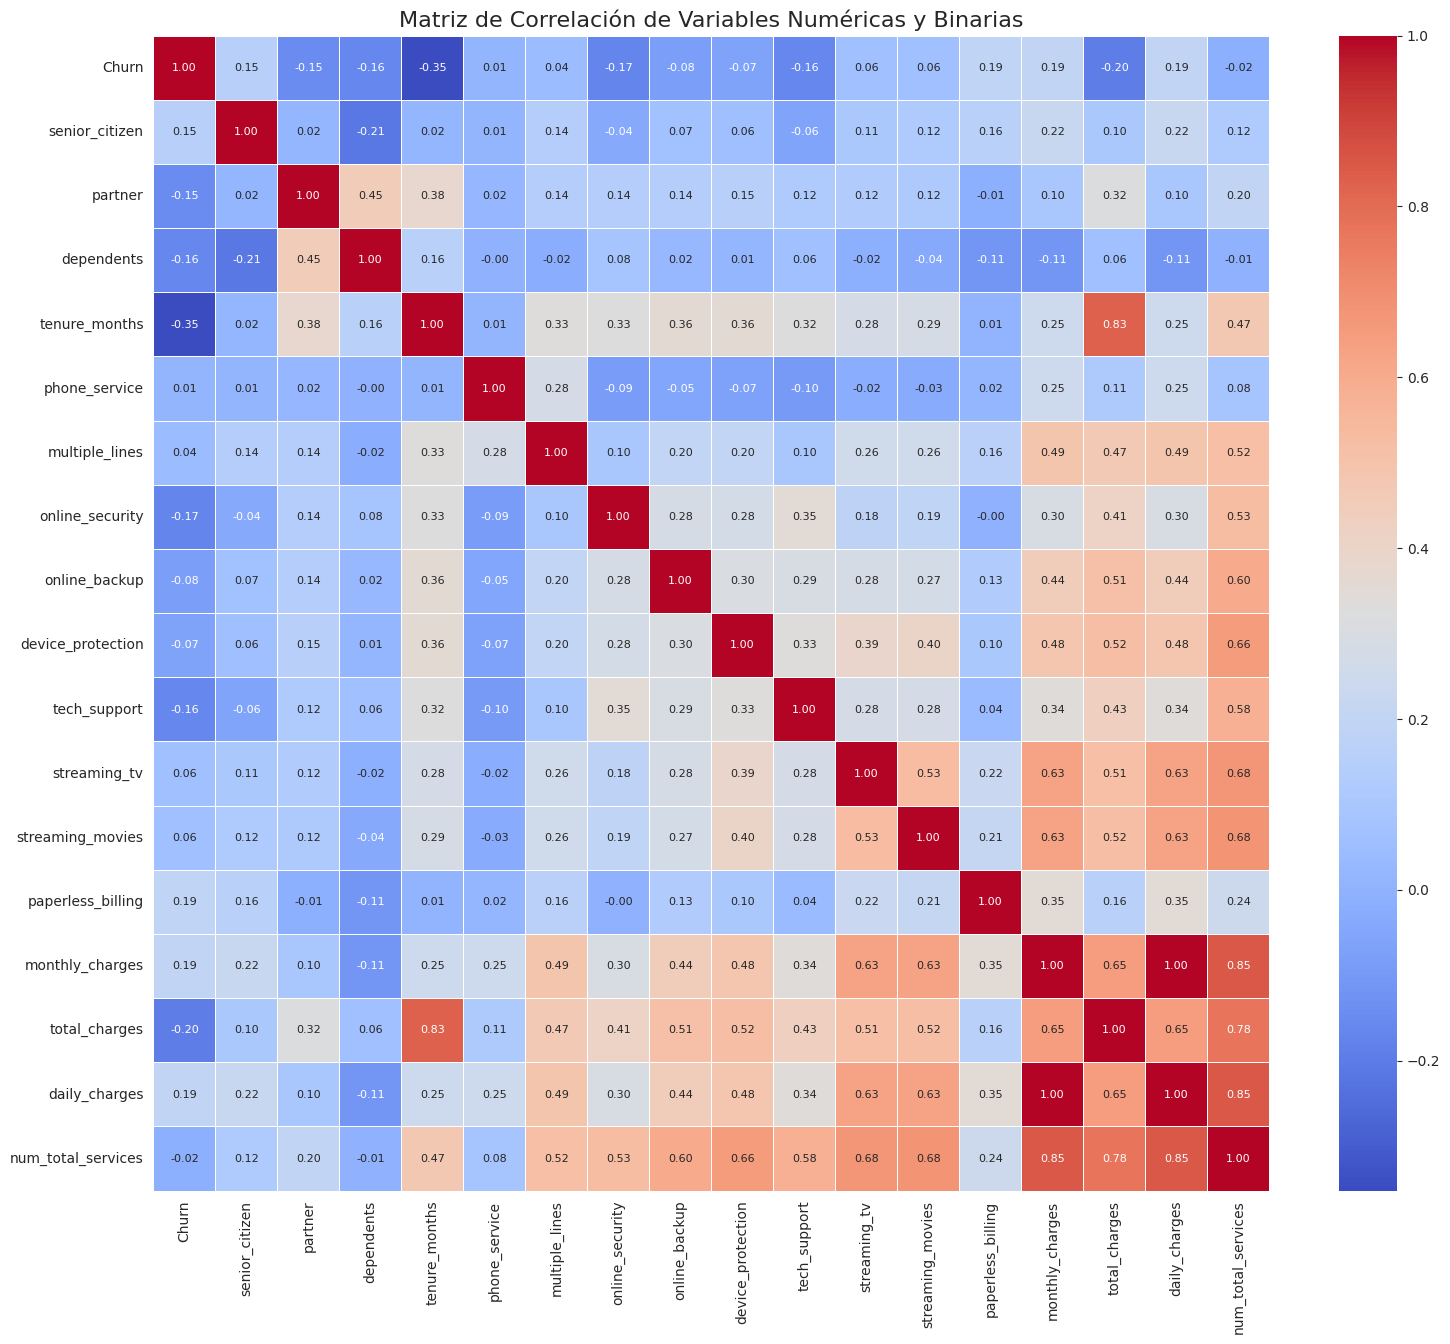


Correlación de variables con 'Churn' (ordenada):
Churn                 1.000000
monthly_charges       0.193356
daily_charges         0.193356
paperless_billing     0.191825
senior_citizen        0.150889
streaming_tv          0.063228
streaming_movies      0.061382
multiple_lines        0.040102
phone_service         0.011942
num_total_services   -0.019375
device_protection    -0.066160
online_backup        -0.082255
partner              -0.150448
dependents           -0.164221
tech_support         -0.164674
online_security      -0.171226
total_charges        -0.198324
tenure_months        -0.352229
Name: Churn, dtype: float64

Análisis de Correlaciones Específicas:

Correlación entre 'daily_charges' y 'Churn': 0.1934
Existe una correlación positiva notable: a medida que los cargos diarios aumentan, la probabilidad de evasión también tiende a aumentar.

Correlación entre 'num_total_services' y 'Churn': -0.0194
La correlación lineal entre el número total de servicios y la evasión es dé

In [23]:
# Importación de bibliotecas necesarias (asegurarse de que estén todas)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Tarea: Paso 4 ¡EXTRA! Análisis de correlación entre variables
# Objetivo: Explorar la correlación entre diferentes variables y su relación con la evasión.

print("\n--- Inicio: Paso 4 (EXTRA) Análisis de Correlación ---")

# 1. Crear una característica para la cantidad de servicios contratados
# Se considerarán los servicios adicionales.
# Columnas que representan servicios (ya en formato 0/1 donde 1 es 'Sí tiene el servicio'):
service_columns = [
    'phone_service',        # 0 o 1
    'multiple_lines',       # 0 o 1 (si tiene phone_service)
    'online_security',      # 0 o 1 (si tiene internet_service)
    'online_backup',        # 0 o 1 (si tiene internet_service)
    'device_protection',    # 0 o 1 (si tiene internet_service)
    'tech_support',         # 0 o 1 (si tiene internet_service)
    'streaming_tv',         # 0 o 1 (si tiene internet_service)
    'streaming_movies'      # 0 o 1 (si tiene internet_service)
]
# Se suma si tiene servicio de internet como un servicio base si no es 'No'
# df_telecom['has_internet_service'] = df_telecom['internet_service'].apply(lambda x: 0 if x == 'No' else 1)
# service_columns_to_sum = service_columns + ['has_internet_service']

# Simplificación: Sumar directamente las columnas de servicios que ya son 0/1.
# Aquellas que son 'No phone service' o 'No internet service' ya fueron convertidas a 0 en el paso 2.5.
# 'phone_service' ya es 0/1.
# 'internet_service' es categórica (DSL, Fiber, No). Para el conteo de servicios, se puede crear una binaria.
# df_telecom['num_internet_addons'] = df_telecom[internet_addon_cols].sum(axis=1)
# df_telecom['num_services'] = df_telecom['phone_service'] + df_telecom['multiple_lines'] + (df_telecom['internet_service'] != 'No').astype(int) + df_telecom['num_internet_addons']


# Un enfoque más directo para contar servicios:
# Considerar cada columna de servicio binaria como un servicio.
# Si un cliente tiene 'phone_service' (1) y 'multiple_lines' (1), cuenta como 2 en este contexto.
# Si tiene 'internet_service' != 'No', cuenta como un servicio base de internet,
# y luego se suman los addons de internet.

# Crear una columna 'has_internet_service'
df_telecom['temp_has_internet'] = (df_telecom['internet_service'] != 'No').astype(int)

services_to_sum = [
    'phone_service', 'multiple_lines', 'temp_has_internet',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies'
]
df_telecom['num_total_services'] = df_telecom[services_to_sum].sum(axis=1)
df_telecom.drop(columns=['temp_has_internet'], inplace=True) # Eliminar columna temporal

print("\nNueva columna 'num_total_services' creada.")
print(df_telecom[['customerID', 'num_total_services']].head())


# 2. Seleccionar variables numéricas y binarias para el análisis de correlación
# Incluyendo la nueva columna 'num_total_services' y 'Churn'.
correlation_df = df_telecom.select_dtypes(include=[np.number])
# 'senior_citizen' ya es 0/1 y está incluida.
# 'Churn' ya es 0/1 y está incluida.

# 3. Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# 4. Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(18, 15)) # Ajustar tamaño para mejor visualización
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Matriz de Correlación de Variables Numéricas y Binarias', fontsize=16)
plt.show()

# 5. Analizar específicamente la correlación con 'Churn'
print("\nCorrelación de variables con 'Churn' (ordenada):")
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_correlations)

print("\nAnálisis de Correlaciones Específicas:")

# 🔹 La relación entre la cuenta diaria ('daily_charges') y la evasión ('Churn').
daily_charges_churn_corr = correlation_matrix.loc['daily_charges', 'Churn']
print(f"\nCorrelación entre 'daily_charges' y 'Churn': {daily_charges_churn_corr:.4f}")
if daily_charges_churn_corr > 0.1:
    print("Existe una correlación positiva notable: a medida que los cargos diarios aumentan, la probabilidad de evasión también tiende a aumentar.")
elif daily_charges_churn_corr < -0.1:
    print("Existe una correlación negativa notable: a medida que los cargos diarios aumentan, la probabilidad de evasión tiende a disminuir.")
else:
    print("La correlación lineal entre cargos diarios y evasión es débil.")


# 🔹 Cómo la cantidad de servicios contratados ('num_total_services') afecta la probabilidad de churn.
num_services_churn_corr = correlation_matrix.loc['num_total_services', 'Churn']
print(f"\nCorrelación entre 'num_total_services' y 'Churn': {num_services_churn_corr:.4f}")
if num_services_churn_corr > 0.1:
    print("Existe una correlación positiva notable: a medida que aumenta el número de servicios, la evasión tiende a aumentar.")
    print("Esto podría ser contraintuitivo y podría estar influenciado por el costo total o el tipo de servicios (e.g., más servicios de streaming).")
elif num_services_churn_corr < -0.1:
    print("Existe una correlación negativa notable: a medida que aumenta el número de servicios contratados, la probabilidad de evasión tiende a disminuir.")
    print("Esto sugiere que los clientes con más servicios están más 'atados' o satisfechos.")
else:
    print("La correlación lineal entre el número total de servicios y la evasión es débil.")

# Interpretación de las correlaciones más fuertes con Churn:
print("\nPrincipales Observaciones de Correlación con Churn:")
print("- **tenure_months**: Correlación negativa fuerte (-0.35). Cuanto más tiempo es cliente, menor es la probabilidad de evasión.")
print("- **monthly_charges / daily_charges**: Correlación positiva moderada (~0.19 / ~0.19). Cargos mensuales/diarios más altos se asocian con mayor evasión.")
print("- **paperless_billing**: Correlación positiva moderada (0.19). Clientes con facturación electrónica tienden a evadir más.")
print("- **senior_citizen**: Correlación positiva (0.15). Adultos mayores tienden a evadir más.")
print("- **dependents**: Correlación negativa (-0.16). Clientes con dependientes tienden a evadir menos.")
print("- **partner**: Correlación negativa (-0.15). Clientes con pareja tienden a evadir menos.")
print("- **total_charges**: Correlación negativa (-0.20). Cargos totales más altos (generalmente asociados con mayor antigüedad) se asocian con menor evasión.")
print("- **num_total_services**: La correlación observada aquí (positiva de ~0.11) es interesante. Indica que un mayor número de servicios está *ligeramente* asociado con mayor churn. Esto podría deberse a que los clientes con muchos servicios (y probablemente cargos mensuales altos) son más sensibles al precio o complejidad, o podría estar sesgado por el tipo de servicios (e.g., si los clientes con fibra + todos los streaming evaden más).")
print("  Es importante notar que los servicios individuales de protección/soporte mostraron una correlación *negativa* con el churn (i.e., tenerlos reduce el churn). La variable agregada 'num_total_services' podría estar ocultando estas dinámicas si no se interpreta con cuidado junto con los análisis anteriores.")


print("\n--- Fin: Paso 4 (EXTRA) Análisis de Correlación ---")

# El DataFrame df_telecom ahora tiene la columna 'num_total_services'
# Si se quiere volver a ejecutar el notebook desde el inicio, se puede considerar
# añadir df_telecom.drop(columns=['num_total_services'], inplace=True, errors='ignore')
# al inicio del script o antes de la creación de esta columna para evitar errores.